In [1]:
import pandas as pd #for working with dataframe
import numpy as np
from scipy import stats, integrate #will help in stats operation in histograms
import matplotlib.pyplot as plt #to plot the PE
import seaborn as sns #nice looking plots
%matplotlib inline
sns.set(color_codes=True)

In [2]:
flatdata_adjusted=pd.read_csv('flatdata_adjusted.csv')

In [3]:
flatdata_adjusted=flatdata_adjusted.assign(DiffYear=flatdata_adjusted['ForecastYear']-flatdata_adjusted['YearForecastProduced'])

In [4]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [5]:
flatdata_adjusted_year=flatdata_adjusted[flatdata_adjusted['DiffYear']>=0]
flatdata_adjusted_year

,BriefDescription,ProjectYear,InternalProjectID,ImprovementType,AreaTypeFuncClass,main_ProjectInformation.State,TollType,TrafficForecast,ForecastYear,ForecastYearType,...,Count,Station_Identifier,main_TrafficCounts.State,CounterID,FunctionalClass,AdjustedForecast,Error,PercentError,AbsPE,DiffYear
0,NaN,2006.0,2320,12.0,3.0,WI,No Tolls on 1+ lane,34000.0,2007,1,...,31500,401399.0,Wisconsin,58-22417-401399,3,34000.0,2500.0,7.352941,7.352941,1.0
1,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,30000.0,2011,1,...,22200,404512.0,Wisconsin,58-22419-404512,3,30000.0,7800.0,26.000000,26.000000,4.0
2,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,19000.0,2011,1,...,20100,404513.0,Wisconsin,58-22421-404513,3,19000.0,-1100.0,-5.789474,5.789474,4.0
3,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,21900.0,2011,1,...,18400,404524.0,Wisconsin,58-22423-404524,4,21900.0,3500.0,15.981735,15.981735,4.0
4,NaN,2006.0,2322,12.0,3.0,WI,No Tolls on 1+ lane,22700.0,2009,1,...,22600,401843.0,Wisconsin,58-22425-401843,3,22700.0,100.0,0.440529,0.440529,3.0
5,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,2800.0,2011,1,...,2500,404541.0,Wisconsin,58-22427-404541,5,2800.0,300.0,10.714286,10.714286,4.0
6,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,33500.0,2011,1,...,33500,404545.0,Wisconsin,58-22429-404545,3,33500.0,0.0,0.000000,0.000000,4.0
7,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,1500.0,2011,1,...,2200,404547.0,Wisconsin,58-22431-404547,7,1500.0,-700.0,-46.666667,46.666667,4.0
8,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,23800.0,2011,1,...,25400,404548.0,Wisconsin,58-22433-404548,3,23800.0,-1600.0,-6.722689,6.722689,4.0
9,NaN,2006.0,2373,12.0,1.0,WI,No Tolls on 1+ lane,8600.0,2008,1,...,6600,510108.0,Wisconsin,58-22435-510108,3,8600.0,2000.0,23.255814,23.255814,2.0


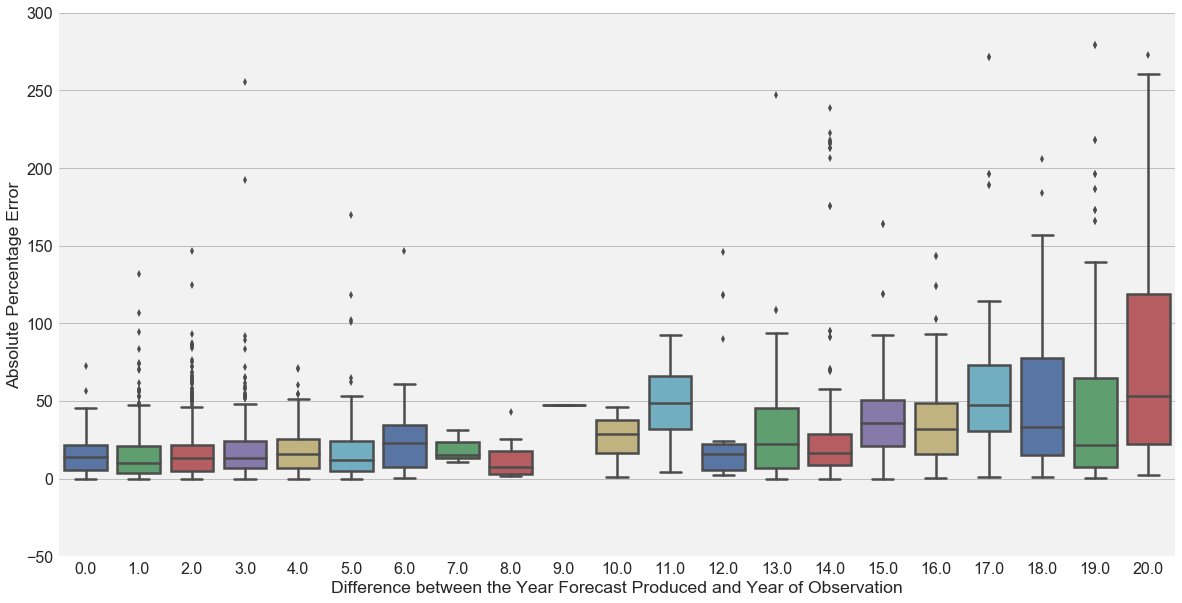

In [156]:
#sns.despine(offset=50, trim=True)
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.boxplot(flatdata_adjusted_year['DiffYear'],flatdata_adjusted_year['AbsPE'],palette='deep')
ax.figure.set_size_inches(20,10)
ax.set_xlim(-0.5
            ,20.5)
ax.set_ylim(-50,300)
#ax.set_title('Number of records in the data set, by date')
ax.set_xlabel('Difference between the Year Forecast Produced and Year of Observation')
ax.set_ylabel('Absolute Percentage Error')
#ax.set_facecolor(axis_bgcolor)
ax.figure.savefig('boxplotyear.png',bbox_inches='tight')

(-150, 150)

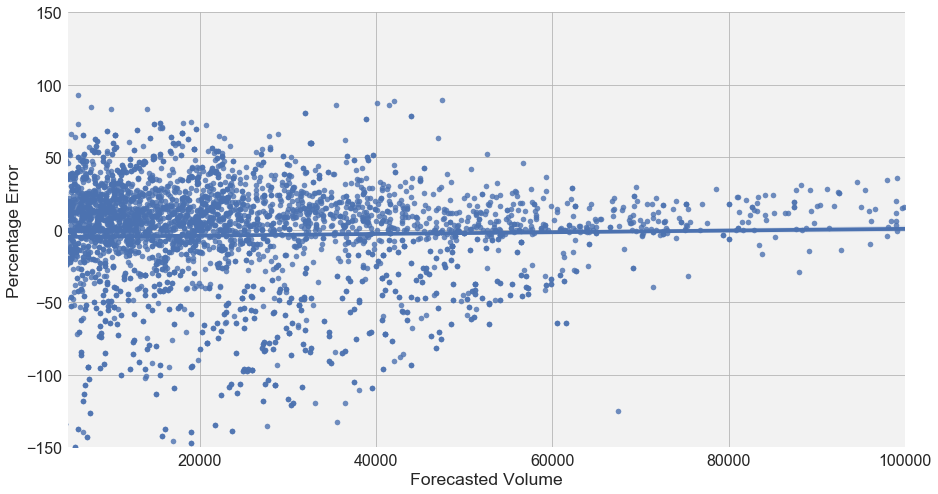

In [157]:
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.regplot(flatdata_adjusted['TrafficForecast'],flatdata_adjusted['PercentError'])
ax.figure.set_size_inches(20,10)
#ax.set_xlim(0
#            ,100000)
ax.set_ylim(-200,200)
#ax.set_title('Number of records in the data set, by date')
ax.set_xlabel('Forecasted Volume')
ax.set_ylabel('Percentage Error')
#ax.set_facecolor(axis_bgcolor)
ax.figure.savefig('scatterplot Percent Error.png',bbox_inches='tight')

ax.figure.set_size_inches(15,8)
ax.set_xlim(5000,100000)

ax.set_ylim(-150,150)

(5000, 70000)

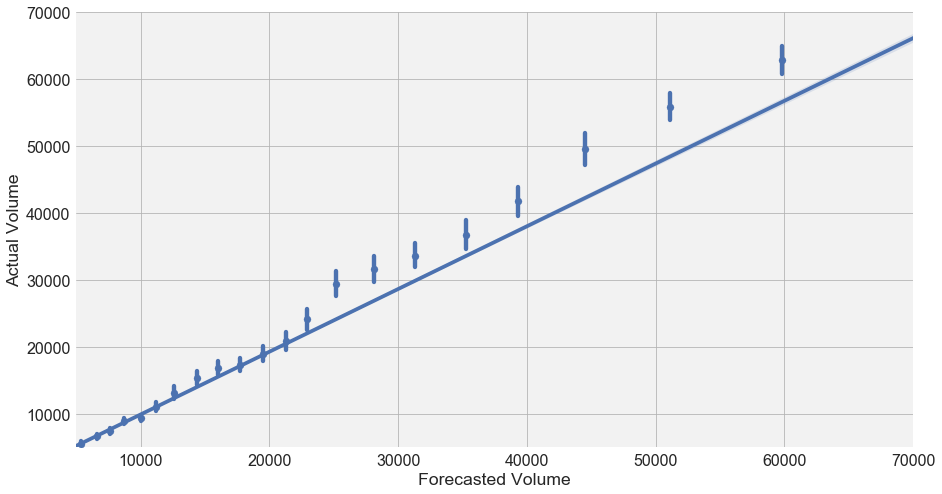

In [85]:
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.regplot(flatdata_adjusted['TrafficForecast'],flatdata_adjusted['Count'], x_bins=25,robust=True)
ax.figure.set_size_inches(20,10)
#ax.set_xlim(0
#            ,100000)
ax.set_ylim(-200,200)
#ax.set_title('Number of records in the data set, by date')
ax.set_xlabel('Forecasted Volume')
ax.set_ylabel('Actual Volume')
#ax.set_facecolor(axis_bgcolor)
#ax.figure.savefig('scatterplot Actual Traffic vs Forecast Traffic.png',bbox_inches='tight')

ax.figure.set_size_inches(15,8)
ax.set_xlim(5000,70000)

ax.set_ylim(5000,70000)

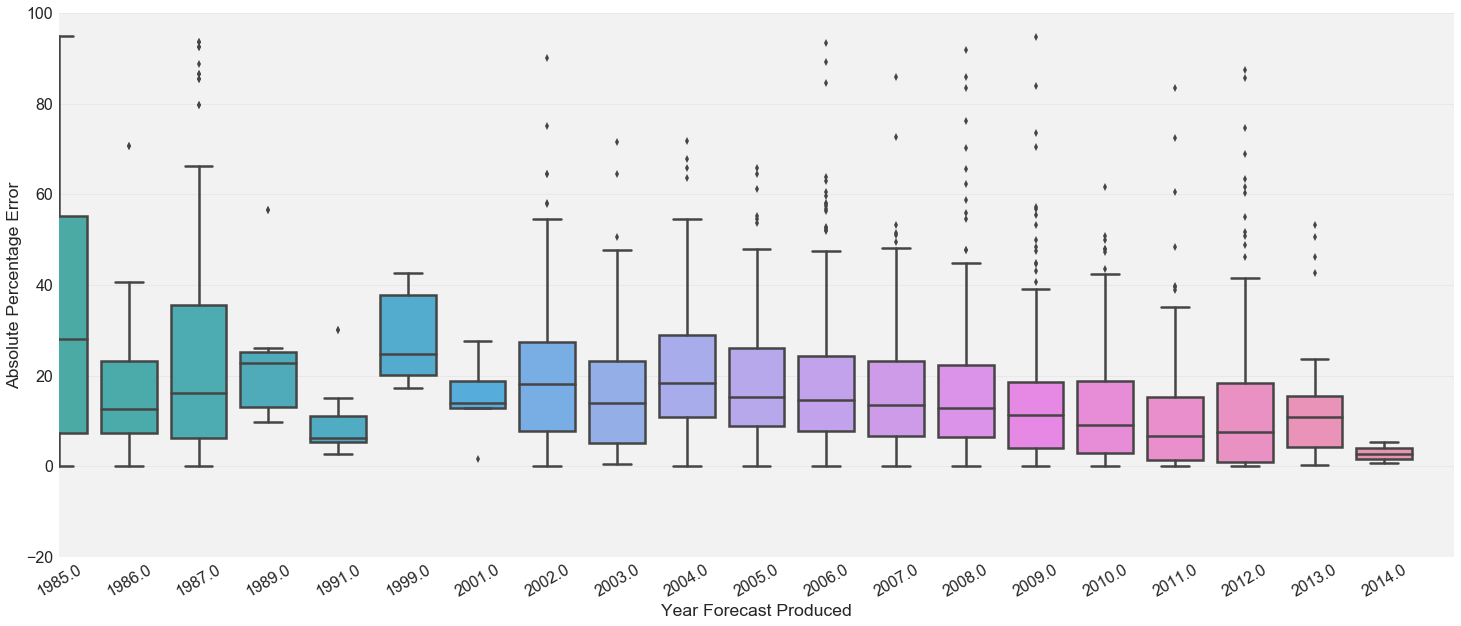

In [158]:
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.9'})
ax=sns.boxplot(flatdata_adjusted['YearForecastProduced'],flatdata_adjusted['AbsPE'])
ax.figure.set_size_inches(25,10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(20,40)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
ax.set_ylim(-20,100)
ax.set_xlabel('Year Forecast Produced')
ax.set_ylabel('Absolute Percentage Error')
ax.figure.savefig('boxplotyearforecastproduced.png',bbox_inches='tight')

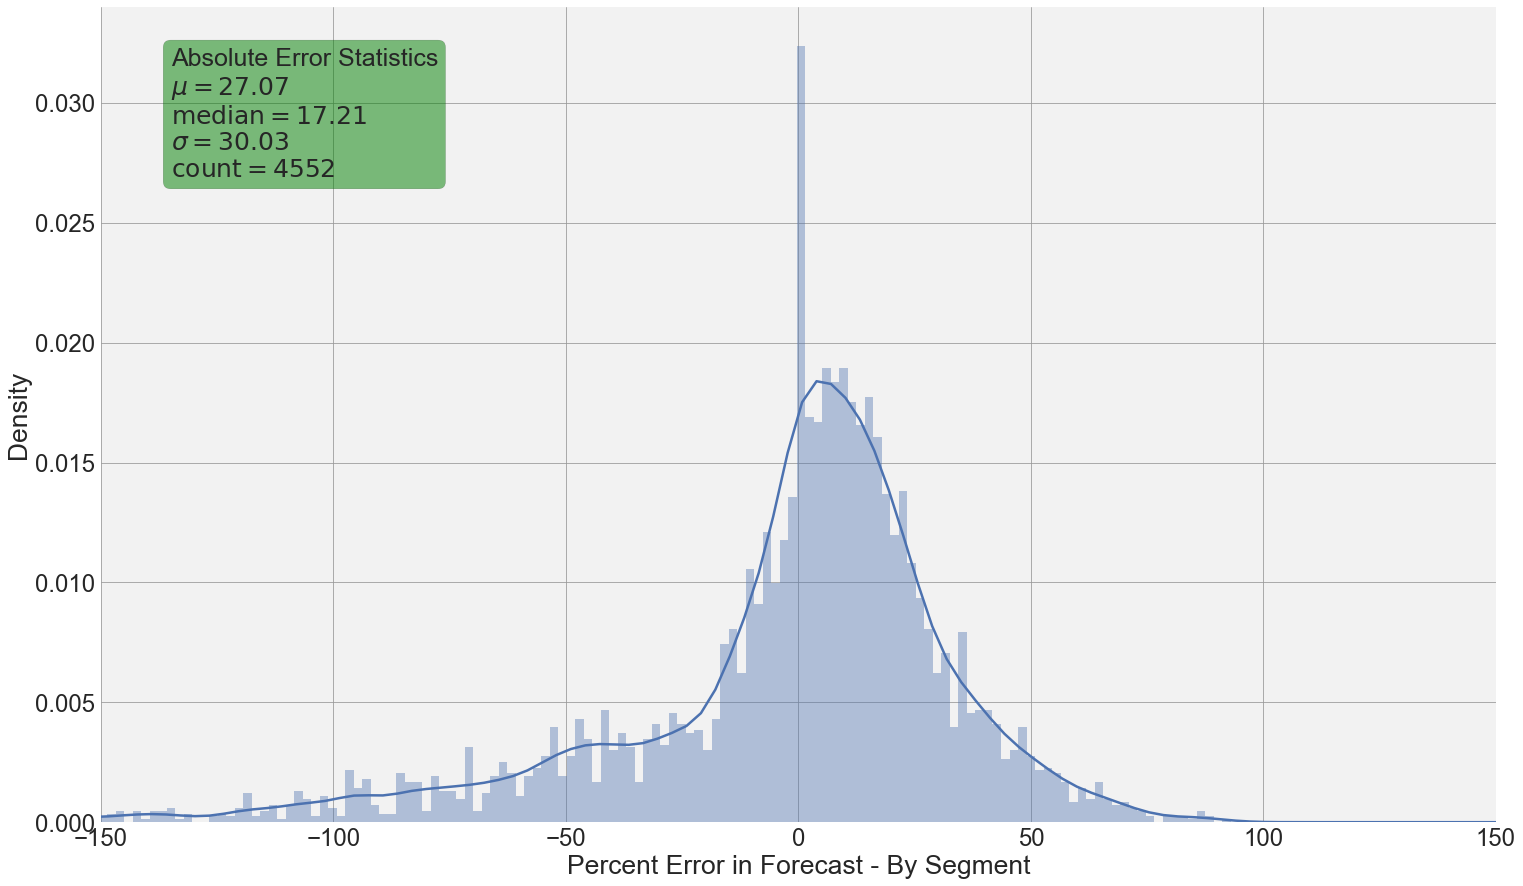

In [8]:
import numpy as np
import matplotlib.pyplot as plt


#fig, ax = plt.subplots()
x = flatdata_adjusted['AbsPE']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = 'Absolute Error Statistics\n$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)


#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        #verticalalignment='top', bbox=props)
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(flatdata_adjusted['PercentError'],bins=200,kde=True,axlabel='Percent Error in Forecast')
ax.figure.set_size_inches(25,15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-150,150)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Percent Error in Forecast - By Segment')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)
ax.figure.savefig('PE Distribution by Segment_No Outliers.png',bbox_inches='tight')

In [39]:
flatdata_adjusted[flatdata_adjusted['AbsPE']>200].to_csv('outliers_greaterthan200.csv')

In [7]:
flatdata_adjusted=flatdata_adjusted[flatdata_adjusted['AbsPE']<200]
flatdata_adjusted

,BriefDescription,ProjectYear,InternalProjectID,ImprovementType,AreaTypeFuncClass,main_ProjectInformation.State,TollType,TrafficForecast,ForecastYear,ForecastYearType,...,Count,Station_Identifier,main_TrafficCounts.State,CounterID,FunctionalClass,AdjustedForecast,Error,PercentError,AbsPE,DiffYear
0,NaN,2006.0,2320,12.0,3.0,WI,No Tolls on 1+ lane,34000.0,2007,1,...,31500,401399.0,Wisconsin,58-22417-401399,3,34000.0,2500.0,7.352941,7.352941,1.0
1,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,30000.0,2011,1,...,22200,404512.0,Wisconsin,58-22419-404512,3,30000.0,7800.0,26.000000,26.000000,4.0
2,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,19000.0,2011,1,...,20100,404513.0,Wisconsin,58-22421-404513,3,19000.0,-1100.0,-5.789474,5.789474,4.0
3,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,21900.0,2011,1,...,18400,404524.0,Wisconsin,58-22423-404524,4,21900.0,3500.0,15.981735,15.981735,4.0
4,NaN,2006.0,2322,12.0,3.0,WI,No Tolls on 1+ lane,22700.0,2009,1,...,22600,401843.0,Wisconsin,58-22425-401843,3,22700.0,100.0,0.440529,0.440529,3.0
5,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,2800.0,2011,1,...,2500,404541.0,Wisconsin,58-22427-404541,5,2800.0,300.0,10.714286,10.714286,4.0
6,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,33500.0,2011,1,...,33500,404545.0,Wisconsin,58-22429-404545,3,33500.0,0.0,0.000000,0.000000,4.0
7,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,1500.0,2011,1,...,2200,404547.0,Wisconsin,58-22431-404547,7,1500.0,-700.0,-46.666667,46.666667,4.0
8,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,23800.0,2011,1,...,25400,404548.0,Wisconsin,58-22433-404548,3,23800.0,-1600.0,-6.722689,6.722689,4.0
9,NaN,2006.0,2373,12.0,1.0,WI,No Tolls on 1+ lane,8600.0,2008,1,...,6600,510108.0,Wisconsin,58-22435-510108,3,8600.0,2000.0,23.255814,23.255814,2.0


In [10]:
flatdata_Woutliers=flatdata_adjusted[flatdata_adjusted['AbsPE']<200]
flatdata_Woutliers

,BriefDescription,ProjectYear,InternalProjectID,ImprovementType,AreaTypeFuncClass,main_ProjectInformation.State,TollType,TrafficForecast,ForecastYear,ForecastYearType,...,Count,Station_Identifier,main_TrafficCounts.State,CounterID,FunctionalClass,AdjustedForecast,Error,PercentError,AbsPE,DiffYear
0,NaN,2006.0,2320,12.0,3.0,WI,No Tolls on 1+ lane,34000.0,2007,1,...,31500,401399.0,Wisconsin,58-22417-401399,3,34000.0,2500.0,7.352941,7.352941,1.0
1,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,30000.0,2011,1,...,22200,404512.0,Wisconsin,58-22419-404512,3,30000.0,7800.0,26.000000,26.000000,4.0
2,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,19000.0,2011,1,...,20100,404513.0,Wisconsin,58-22421-404513,3,19000.0,-1100.0,-5.789474,5.789474,4.0
3,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,21900.0,2011,1,...,18400,404524.0,Wisconsin,58-22423-404524,4,21900.0,3500.0,15.981735,15.981735,4.0
4,NaN,2006.0,2322,12.0,3.0,WI,No Tolls on 1+ lane,22700.0,2009,1,...,22600,401843.0,Wisconsin,58-22425-401843,3,22700.0,100.0,0.440529,0.440529,3.0
5,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,2800.0,2011,1,...,2500,404541.0,Wisconsin,58-22427-404541,5,2800.0,300.0,10.714286,10.714286,4.0
6,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,33500.0,2011,1,...,33500,404545.0,Wisconsin,58-22429-404545,3,33500.0,0.0,0.000000,0.000000,4.0
7,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,1500.0,2011,1,...,2200,404547.0,Wisconsin,58-22431-404547,7,1500.0,-700.0,-46.666667,46.666667,4.0
8,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,23800.0,2011,1,...,25400,404548.0,Wisconsin,58-22433-404548,3,23800.0,-1600.0,-6.722689,6.722689,4.0
9,NaN,2006.0,2373,12.0,1.0,WI,No Tolls on 1+ lane,8600.0,2008,1,...,6600,510108.0,Wisconsin,58-22435-510108,3,8600.0,2000.0,23.255814,23.255814,2.0


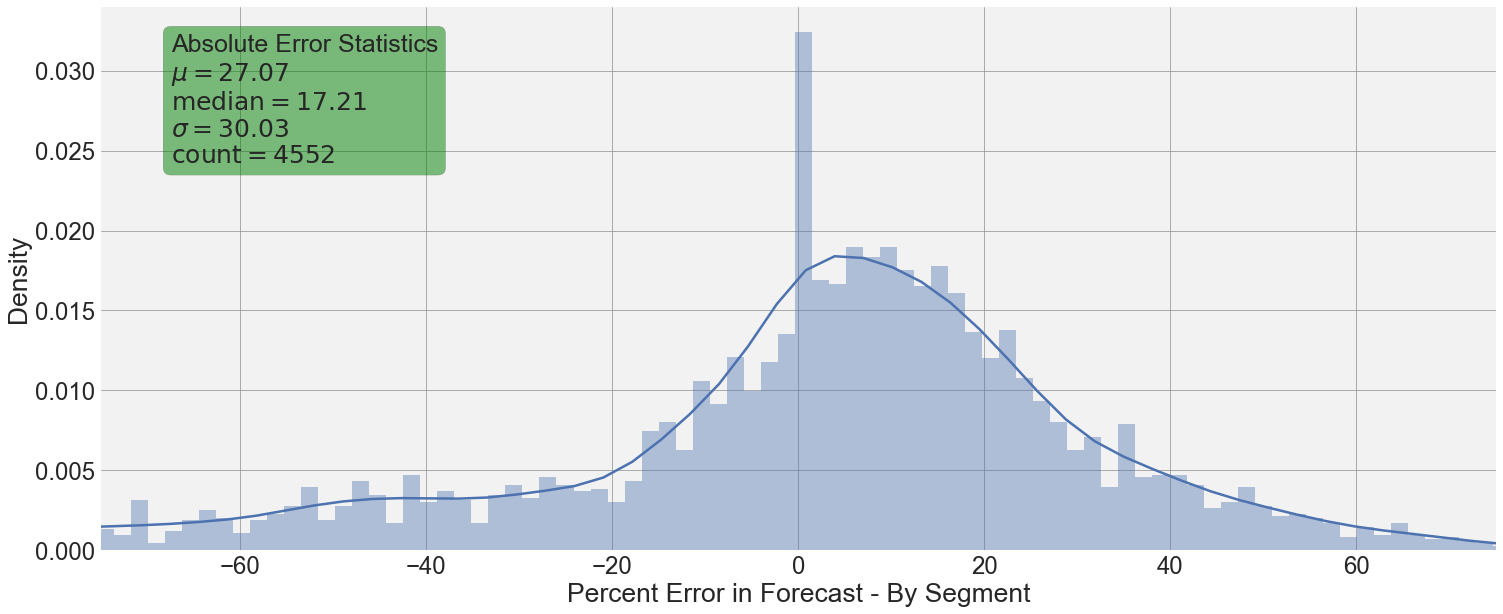

In [11]:
import numpy as np
import matplotlib.pyplot as plt


#fig, ax = plt.subplots()
x = flatdata_adjusted['AbsPE']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = 'Absolute Error Statistics\n$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)


#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(flatdata_Woutliers['PercentError'],bins=200,kde=True,axlabel='Percent Error in Forecast')
ax.figure.set_size_inches(25,10)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-75,75)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Percent Error in Forecast - By Segment')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)
ax.figure.savefig('PE Distribution by Segment_No Outliers.png',bbox_inches='tight')

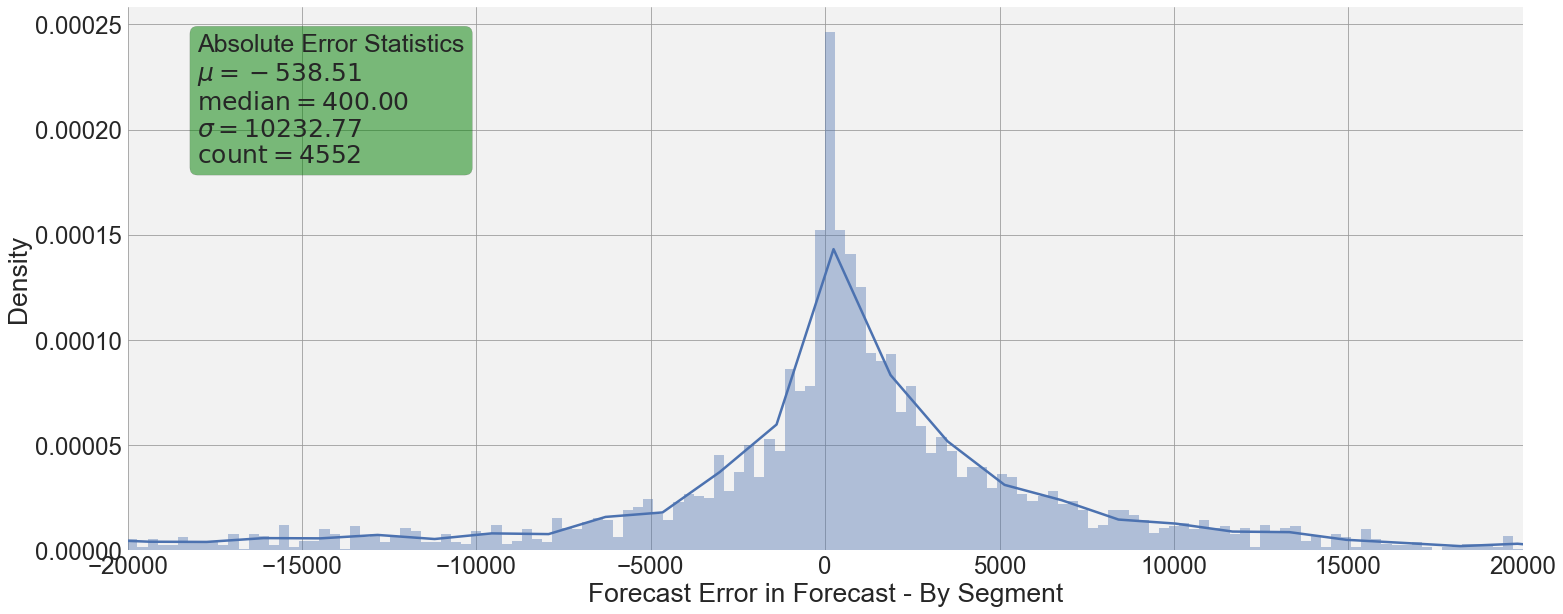

In [12]:
import numpy as np
import matplotlib.pyplot as plt


#fig, ax = plt.subplots()
x = flatdata_Woutliers['Error']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = 'Absolute Error Statistics\n$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)


#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(flatdata_Woutliers['Error'],bins=700,kde=True)
ax.figure.set_size_inches(25,10)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-20000,20000)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Forecast Error in Forecast - By Segment')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)
ax.figure.savefig('Error Distribution by Segment_No Outliers.png',bbox_inches='tight')

In [13]:
averagecount=flatdata_adjusted['Count'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='AverageCount')
averageforecast=flatdata_adjusted['AdjustedForecast'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='AverageForecast')
improvement_type=flatdata_adjusted['ImprovementType'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='ImprovementType')
forecast_method=flatdata_adjusted['ForecastMethodology'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Forecast_Method')
func_class=flatdata_adjusted['FunctionalClass'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Func_Class')
diff_year=flatdata_adjusted['DiffYear'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Diff_Year')
#project_error=pd.merge(averagecount,averageforecast,left_on='InternalProjectID')
#project_error
#func_class

In [15]:
by_year=flatdata_adjusted['AbsPE'].groupby(flatdata_adjusted['YearForecastProduced']).mean().to_frame(name='MeanAbsPE')
by_year.to_csv('by_year.csv')

In [16]:
by_year=pd.read_csv('by_year.csv')
by_year

,YearForecastProduced,MeanAbsPE
0,0.0,62.842700
1,1962.0,99.030860
2,1963.0,65.142891
3,1964.0,37.045681
4,1965.0,28.438757
5,1966.0,25.699627
6,1967.0,26.315043
7,1968.0,28.319036
8,1969.0,16.629201
9,1970.0,37.186544


In [17]:
by_year=by_year[by_year['YearForecastProduced']>0]

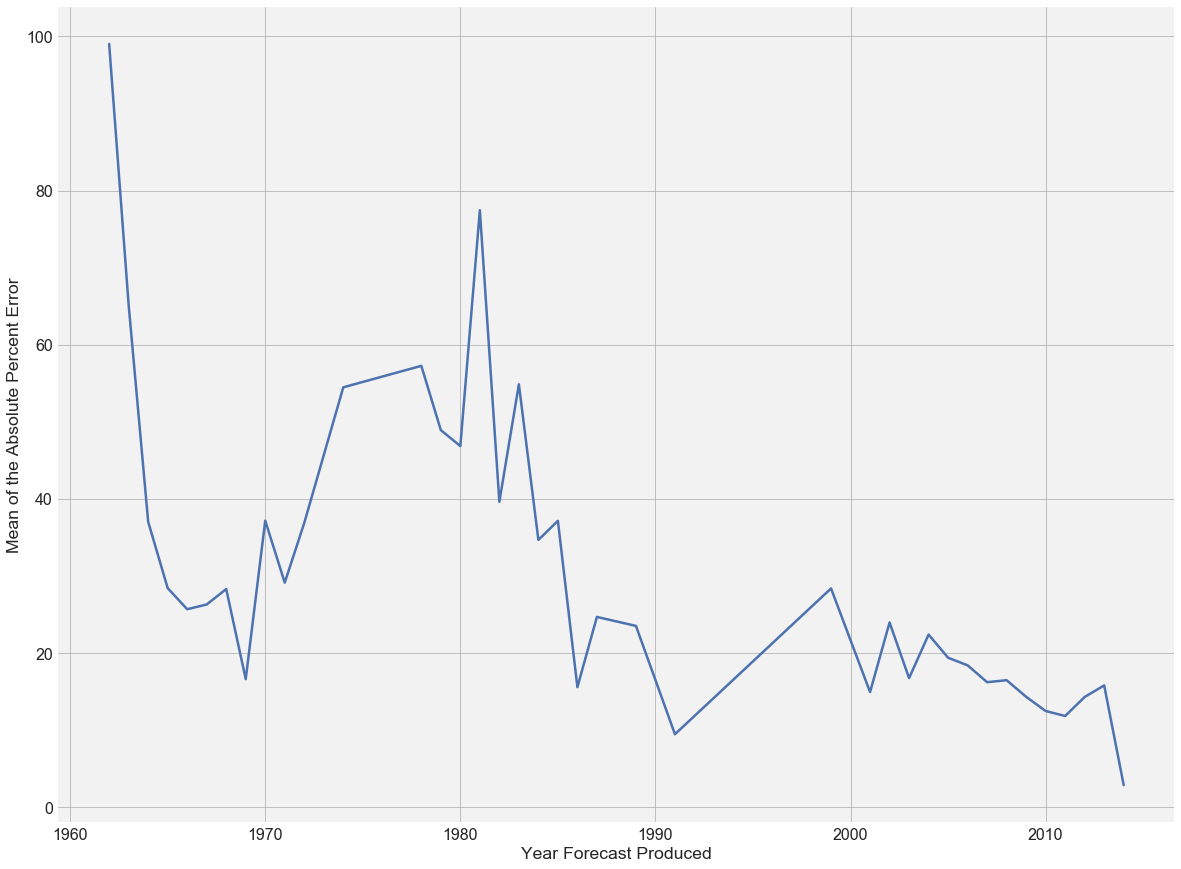

In [18]:
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
plt.figure(figsize=(20,15))
ax=plt.plot(by_year['YearForecastProduced'],by_year['MeanAbsPE'])

plt.xlabel('Year Forecast Produced')
plt.ylabel('Mean of the Absolute Percent Error')

#ax.set_size_inches(20,10)
#ax.set_xlim(0
#            ,100000)
#ax.set_ylim(-200,200)
#ax.set_title('Number of records in the data set, by date')
#ax.set_xlabel('Forecasted Volume')
#ax.set_ylabel('Percentage Error')
#ax.set_facecolor(axis_bgcolor)
#ax.figure.savefig('scatterplot Percent Error.png')

#ax.figure.set_size_inches(15,8)
#ax.set_xlim(1960,2018)

#ax.set_ylim(-150,150)
plt.savefig('MAPE by the Years.png', bbox_inches='tight')

In [50]:
pd.options.display.max_columns=50

In [19]:
project_error=pd.merge(averagecount,averageforecast,left_index=True,right_index=True)
project_error

,AverageCount,AverageForecast
InternalProjectID,,
10914,67797.500000,69861.250000
12343,99720.000000,99724.000000
12356,28800.000000,31001.000000
13364,4610.000000,4910.000000
13486,53705.000000,60317.500000
13624,580.000000,635.000000
14821,34445.000000,28621.750000
16144,15556.000000,16568.736842
16514,54630.000000,58143.333333


In [20]:
project_error=project_error.assign(Error=project_error['AverageForecast']-project_error['AverageCount'])
project_error

,AverageCount,AverageForecast,Error
InternalProjectID,,,
10914,67797.500000,69861.250000,2063.750000
12343,99720.000000,99724.000000,4.000000
12356,28800.000000,31001.000000,2201.000000
13364,4610.000000,4910.000000,300.000000
13486,53705.000000,60317.500000,6612.500000
13624,580.000000,635.000000,55.000000
14821,34445.000000,28621.750000,-5823.250000
16144,15556.000000,16568.736842,1012.736842
16514,54630.000000,58143.333333,3513.333333


In [21]:
project_error=project_error.assign(PercentError=100*project_error['Error']/project_error['AverageForecast'])

In [22]:
flatdata_adjusted.AreaTypeFuncClass.describe()

count    2828.000000
mean        3.552334
std         0.859260
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: AreaTypeFuncClass, dtype: float64

In [23]:
project_error=project_error.assign(AbsPE=np.abs(project_error['PercentError']))

In [24]:
project_error=pd.merge(project_error,improvement_type,left_index=True,right_index=True)

In [25]:
project_error=pd.merge(project_error,func_class,left_index=True,right_index=True)

In [26]:
project_error=pd.merge(project_error,forecast_method,left_index=True,right_index=True)

In [27]:
project_error=pd.merge(project_error,diff_year,left_index=True,right_index=True)

In [28]:
project_error3=project_error.assign(AbsError=np.abs(project_error['Error']))

In [60]:
project_error

,AverageCount,AverageForecast,Error,PercentError,AbsPE,ImprovementType,Func_Class,Forecast_Method,Diff_Year
InternalProjectID,,,,,,,,,
10914,67797.500000,69861.250000,2063.750000,2.954070,2.954070,11.000000,1.000000,6.0,1.000000
12343,99720.000000,99724.000000,4.000000,0.004011,0.004011,1.000000,1.000000,6.0,5.000000
12356,28800.000000,31001.000000,2201.000000,7.099771,7.099771,12.000000,1.000000,6.0,3.000000
13364,4610.000000,4910.000000,300.000000,6.109980,6.109980,1.000000,5.000000,6.0,1.000000
13486,53705.000000,60317.500000,6612.500000,10.962822,10.962822,3.000000,1.000000,6.0,5.000000
13624,580.000000,635.000000,55.000000,8.661417,8.661417,1.000000,6.000000,6.0,0.000000
14821,34445.000000,28621.750000,-5823.250000,-20.345541,20.345541,3.000000,4.000000,6.0,2.000000
16144,15556.000000,16568.736842,1012.736842,6.112336,6.112336,2.000000,3.000000,6.0,6.000000
16514,54630.000000,58143.333333,3513.333333,6.042539,6.042539,11.000000,1.000000,6.0,6.000000


In [29]:
def UnifiedImprovement(x): #to adjust the forecast
    if x.ImprovementType<7:
        unifiedtype=1
    elif x.ImprovementType<12:
        unifiedtype=2
    else:
        unifiedtype=3
    return unifiedtype

In [30]:
project_error2=project_error.assign(UnifiedImprovementType=project_error.apply(UnifiedImprovement, axis=1))

In [42]:
project_error2.to_csv('project_error2.csv')

In [31]:
nicolaisen=pd.read_csv('Nicolaisen.csv', encoding='latin1',)
nicolaisen

,InternalProjectID,AverageForecast,AverageCount,Forecast_Method,AbsPE,PercentError,UnifiedImprovementType,Error
0,5,19300.0,16800.0,1,12.953368,-12.953368,6,2500
1,8,9700.0,9112.0,1,6.061856,-6.061856,6,588
2,9,31000.0,32405.0,4,4.532258,4.532258,6,-1405
3,11,15900.0,15600.0,1,1.886792,-1.886792,6,300
4,14,45900.0,55526.0,6,20.971678,20.971678,6,-9626
5,15,67300.0,68726.0,6,2.118871,2.118871,6,-1426
6,18,4300.0,7584.0,6,76.372093,76.372093,6,-3284
7,22,7500.0,8300.0,6,10.666667,10.666667,6,-800
8,23,9800.0,21932.0,6,123.795918,123.795918,6,-12132
9,25,17500.0,14200.0,6,18.857143,-18.857143,6,3300


In [32]:
nicolaisen=nicolaisen.set_index('InternalProjectID')
nicolaisen

,AverageForecast,AverageCount,Forecast_Method,AbsPE,PercentError,UnifiedImprovementType,Error
InternalProjectID,,,,,,,
5,19300.0,16800.0,1,12.953368,-12.953368,6,2500
8,9700.0,9112.0,1,6.061856,-6.061856,6,588
9,31000.0,32405.0,4,4.532258,4.532258,6,-1405
11,15900.0,15600.0,1,1.886792,-1.886792,6,300
14,45900.0,55526.0,6,20.971678,20.971678,6,-9626
15,67300.0,68726.0,6,2.118871,2.118871,6,-1426
18,4300.0,7584.0,6,76.372093,76.372093,6,-3284
22,7500.0,8300.0,6,10.666667,10.666667,6,-800
23,9800.0,21932.0,6,123.795918,123.795918,6,-12132


In [33]:
project_error2=project_error2.drop(labels='ImprovementType',axis=1)
project_error2

,AverageCount,AverageForecast,Error,PercentError,AbsPE,Func_Class,Forecast_Method,Diff_Year,UnifiedImprovementType
InternalProjectID,,,,,,,,,
10914,67797.500000,69861.250000,2063.750000,2.954070,2.954070,1.000000,6.0,1.000000,2
12343,99720.000000,99724.000000,4.000000,0.004011,0.004011,1.000000,6.0,5.000000,1
12356,28800.000000,31001.000000,2201.000000,7.099771,7.099771,1.000000,6.0,3.000000,3
13364,4610.000000,4910.000000,300.000000,6.109980,6.109980,5.000000,6.0,1.000000,1
13486,53705.000000,60317.500000,6612.500000,10.962822,10.962822,1.000000,6.0,5.000000,1
13624,580.000000,635.000000,55.000000,8.661417,8.661417,6.000000,6.0,0.000000,1
14821,34445.000000,28621.750000,-5823.250000,-20.345541,20.345541,4.000000,6.0,2.000000,1
16144,15556.000000,16568.736842,1012.736842,6.112336,6.112336,3.000000,6.0,6.000000,1
16514,54630.000000,58143.333333,3513.333333,6.042539,6.042539,1.000000,6.0,6.000000,2


In [34]:
project_error3=pd.merge(project_error2,nicolaisen,how='outer')

In [35]:
project_error2=pd.read_csv('project_error2.csv')
project_error2

,InternalProjectID,AverageCount,AverageForecast,Error,PercentError,AbsPE,Func_Class,Forecast_Method,Diff_Year,UnifiedImprovementType
0,10914,67797.500000,69861.250000,2063.750000,2.954069674,2.954069674,1.000000,6.0,1.0,2
1,12343,99720.000000,99724.000000,4.000000,0.004011071,0.004011071,1.000000,6.0,5.0,1
2,12356,28800.000000,31001.000000,2201.000000,7.099770975,7.099770975,1.000000,6.0,3.0,3
3,13364,4610.000000,4910.000000,300.000000,6.109979633,6.109979633,5.000000,6.0,1.0,1
4,13486,53705.000000,60317.500000,6612.500000,10.96282173,10.96282173,1.000000,6.0,5.0,1
5,13624,580.000000,635.000000,55.000000,8.661417323,8.661417323,6.000000,6.0,0.0,1
6,14821,34445.000000,28621.750000,-5823.250000,-20.34554142,20.34554142,4.000000,6.0,2.0,1
7,16144,15556.000000,16568.736840,1012.736842,6.112335851,6.112335851,3.000000,6.0,6.0,1
8,16514,54630.000000,58143.333330,3513.333333,6.042538554,6.042538554,1.000000,6.0,6.0,2
9,16579,2190.000000,2193.500000,3.500000,0.159562343,0.159562343,5.000000,6.0,0.0,1


In [36]:
project_error2=project_error2[project_error2['AverageForecast'].notnull()]
project_error2

,InternalProjectID,AverageCount,AverageForecast,Error,PercentError,AbsPE,Func_Class,Forecast_Method,Diff_Year,UnifiedImprovementType
0,10914,67797.500000,69861.250000,2063.750000,2.954069674,2.954069674,1.000000,6.0,1.0,2
1,12343,99720.000000,99724.000000,4.000000,0.004011071,0.004011071,1.000000,6.0,5.0,1
2,12356,28800.000000,31001.000000,2201.000000,7.099770975,7.099770975,1.000000,6.0,3.0,3
3,13364,4610.000000,4910.000000,300.000000,6.109979633,6.109979633,5.000000,6.0,1.0,1
4,13486,53705.000000,60317.500000,6612.500000,10.96282173,10.96282173,1.000000,6.0,5.0,1
5,13624,580.000000,635.000000,55.000000,8.661417323,8.661417323,6.000000,6.0,0.0,1
6,14821,34445.000000,28621.750000,-5823.250000,-20.34554142,20.34554142,4.000000,6.0,2.0,1
7,16144,15556.000000,16568.736840,1012.736842,6.112335851,6.112335851,3.000000,6.0,6.0,1
8,16514,54630.000000,58143.333330,3513.333333,6.042538554,6.042538554,1.000000,6.0,6.0,2
9,16579,2190.000000,2193.500000,3.500000,0.159562343,0.159562343,5.000000,6.0,0.0,1


In [37]:
#result['StatID']=result['StationID'].astype('float')
project_error2['AbsPE']=project_error2['AbsPE'].astype('float')

C:\Users\jho337\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
project_error2['PercentError']=project_error2['PercentError'].astype('float')

C:\Users\jho337\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
project_error2['PercentError'].describe()

count    1298.000000
mean        4.894940
std        27.405929
min      -231.125828
25%        -2.497517
50%         7.463823
75%        18.285169
max        86.645461
Name: PercentError, dtype: float64

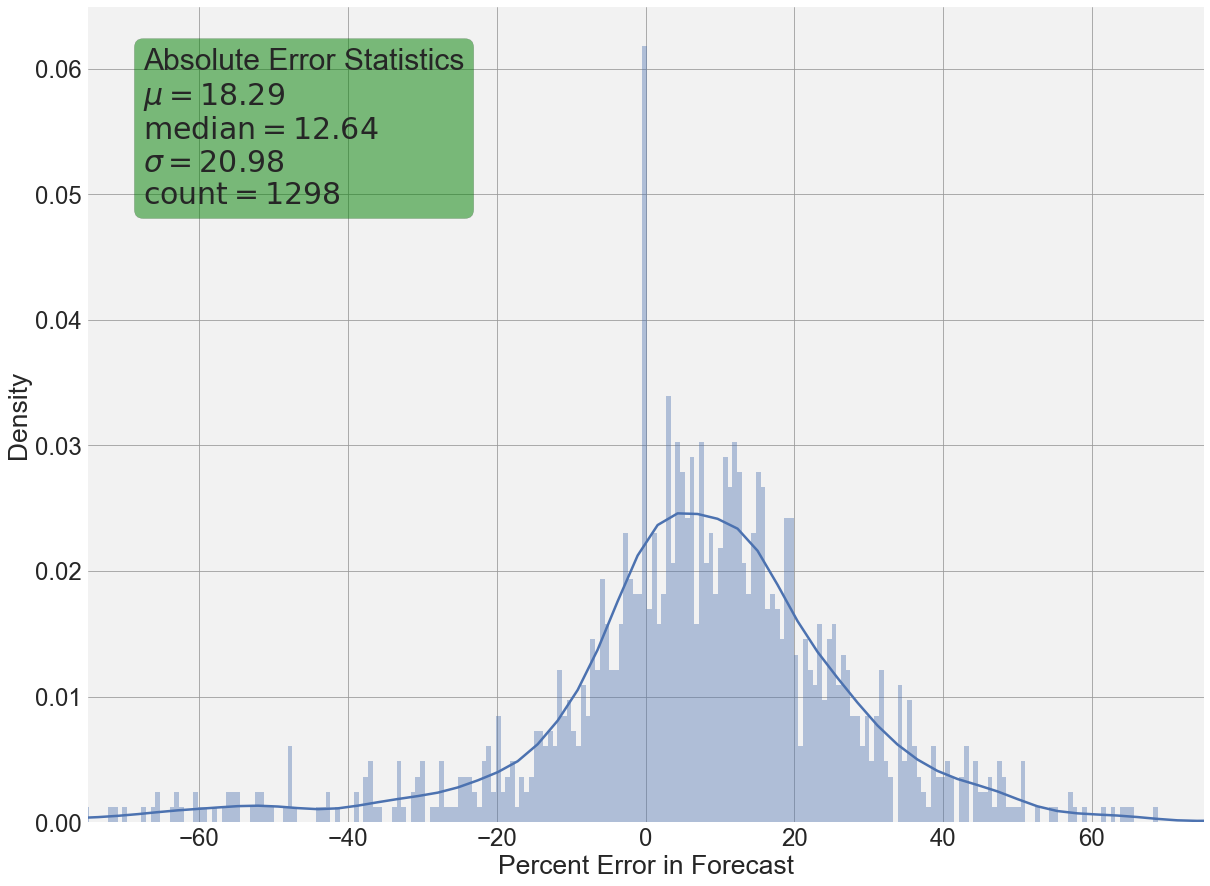

In [40]:
import numpy as np
import matplotlib.pyplot as plt


#fig, ax = plt.subplots()
x = project_error2['AbsPE']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = 'Absolute Error Statistics\n$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)


#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        #verticalalignment='top', bbox=props)

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
ax.figure.set_size_inches(20,15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-75,75)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Percent Error in Forecast')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=30, verticalalignment='top', bbox=props)

#plt.show()
ax.figure.savefig('Percent Error Distribution by Project_No Outliers.png',bbox_inches='tight')

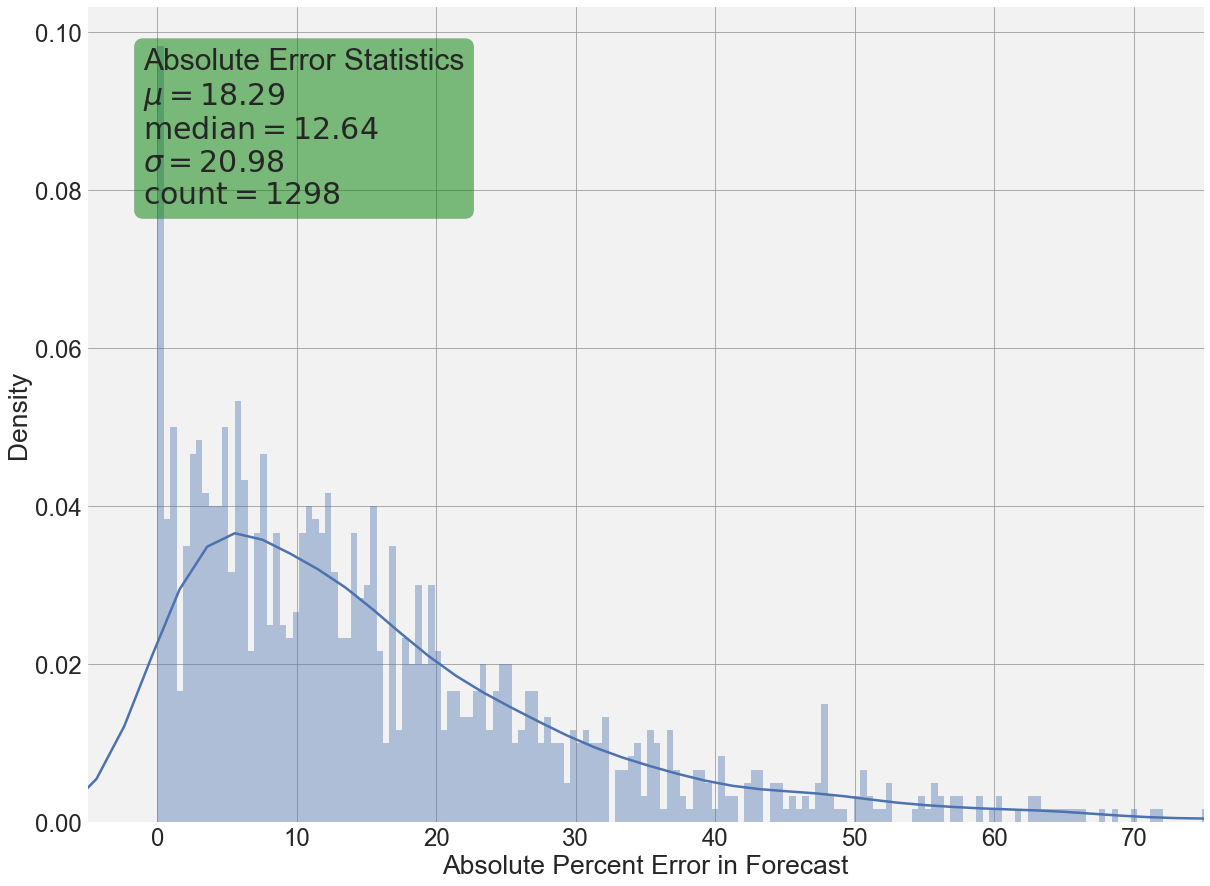

In [189]:
import numpy as np
import matplotlib.pyplot as plt


#fig, ax = plt.subplots()
x = project_error2['AbsPE']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = 'Absolute Error Statistics\n$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)


#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        #verticalalignment='top', bbox=props)

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(project_error2['AbsPE'],bins=500,kde=True)
ax.figure.set_size_inches(20,15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-5,75)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Absolute Percent Error in Forecast')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=30, verticalalignment='top', bbox=props)

#plt.show()
ax.figure.savefig('Absolute Percent Error Distribution by Project_No Outliers.png',bbox_inches='tight')

In [172]:
error_method1=project_error[project_error['Forecast_Method']==1]#forecasts done by Traffic Count Trend
error_method2=project_error[project_error['Forecast_Method']==4]#forecasts done by TDM
error_method3=project_error[project_error['Forecast_Method']==6] #unknown methodology

In [173]:
tct_lowrisk=error_method1[error_method1['ImprovementType']==1]
tct_highrisk=error_method1[error_method1['ImprovementType']>1]
tdm_lowrisk=error_method2[error_method2['ImprovementType']==1]
tdm_highrisk=error_method2[error_method2['ImprovementType']>1]

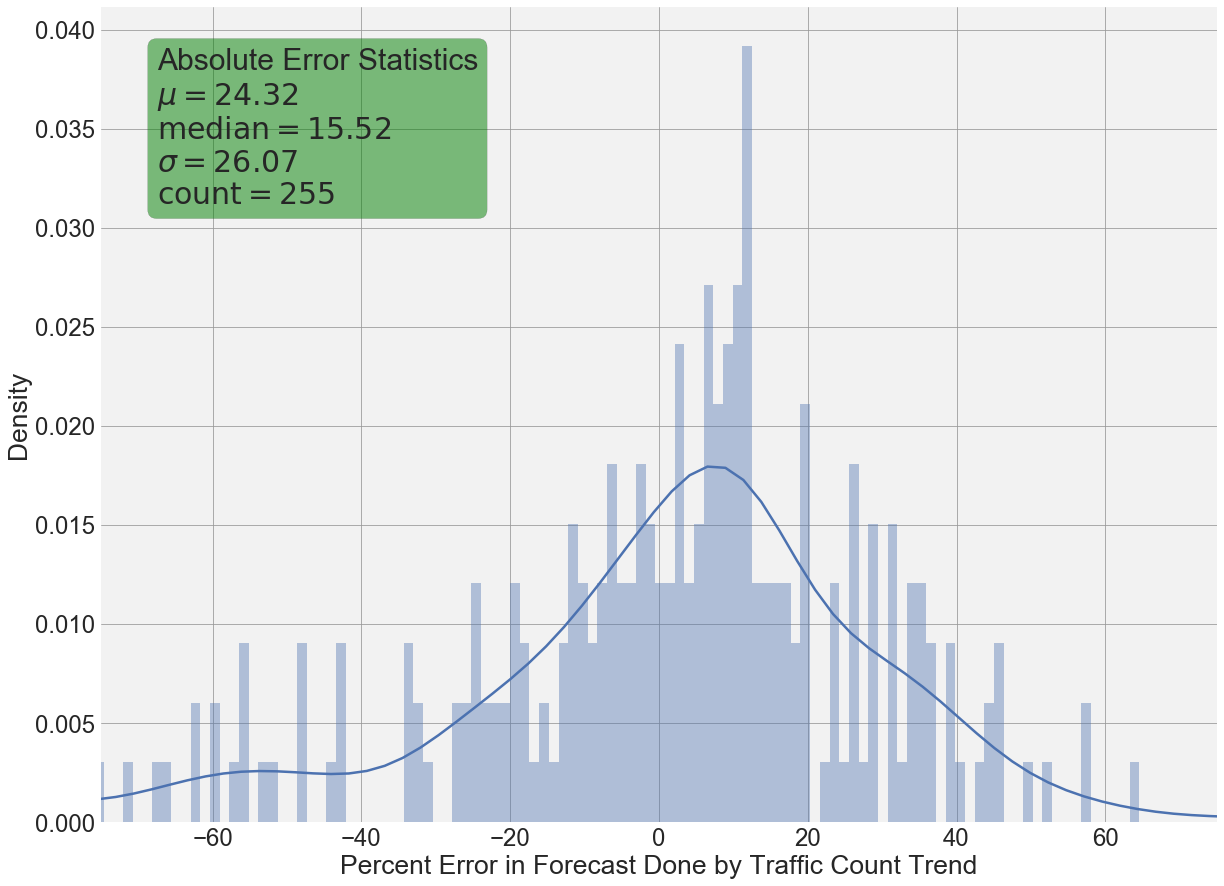

In [190]:
import numpy as np
import matplotlib.pyplot as plt


#fig, ax = plt.subplots()
x = error_method1['AbsPE']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = 'Absolute Error Statistics\n$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)


#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        #verticalalignment='top', bbox=props)

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(error_method1['PercentError'],bins=200,kde=True)
ax.figure.set_size_inches(20,15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-75,75)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Percent Error in Forecast Done by Traffic Count Trend')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=30, verticalalignment='top', bbox=props)

#plt.show()
ax.figure.savefig('Percent Error Distribution by Traffic Count Trend.png',bbox_inches='tight')

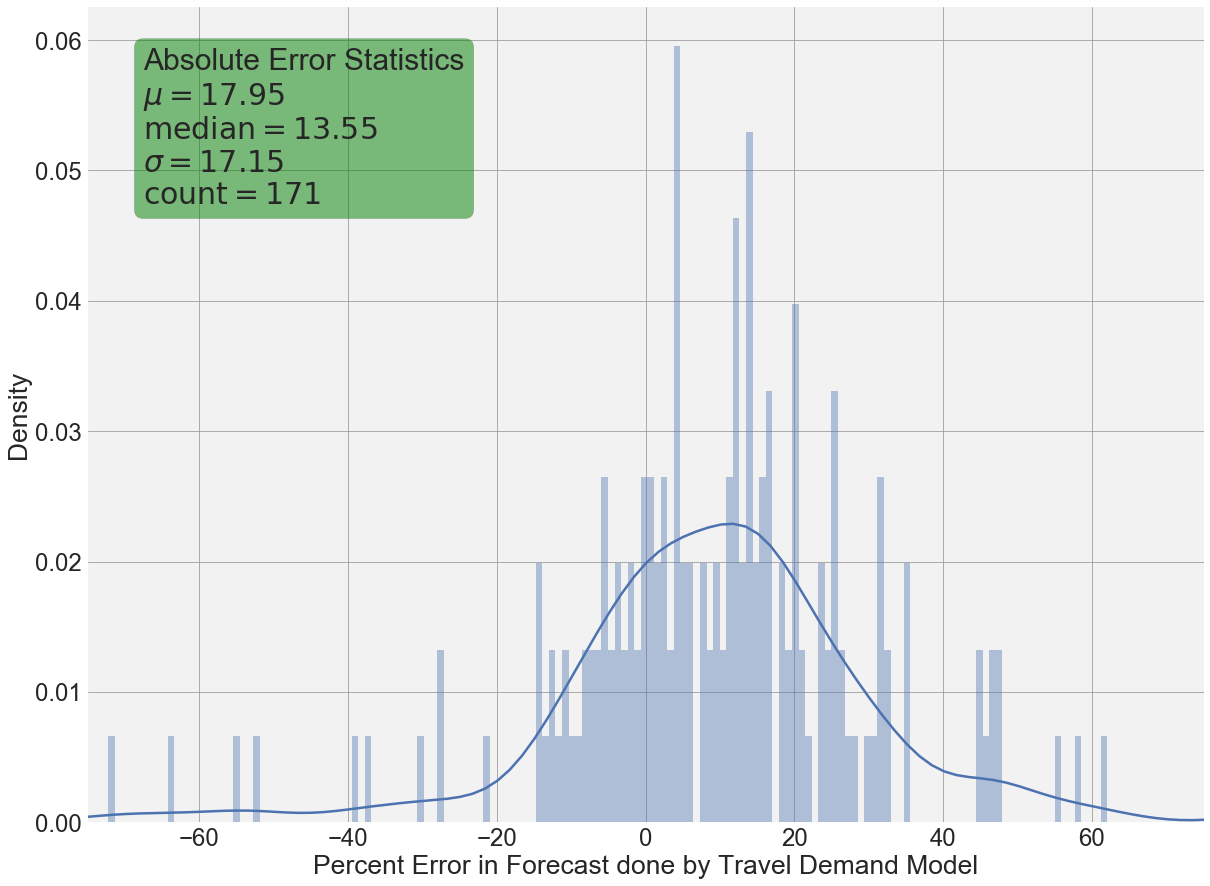

In [184]:
import numpy as np
import matplotlib.pyplot as plt


#fig, ax = plt.subplots()
x = error_method2['AbsPE']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = 'Absolute Error Statistics\n$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)


#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        #verticalalignment='top', bbox=props)

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(error_method2['PercentError'],bins=200,kde=True)
ax.figure.set_size_inches(20,15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-75,75)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Percent Error in Forecast done by Travel Demand Model')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=30, verticalalignment='top', bbox=props)

#plt.show()
ax.figure.savefig('Percent Error Distribution by Travel Demand Model.png',bbox_inches='tight')

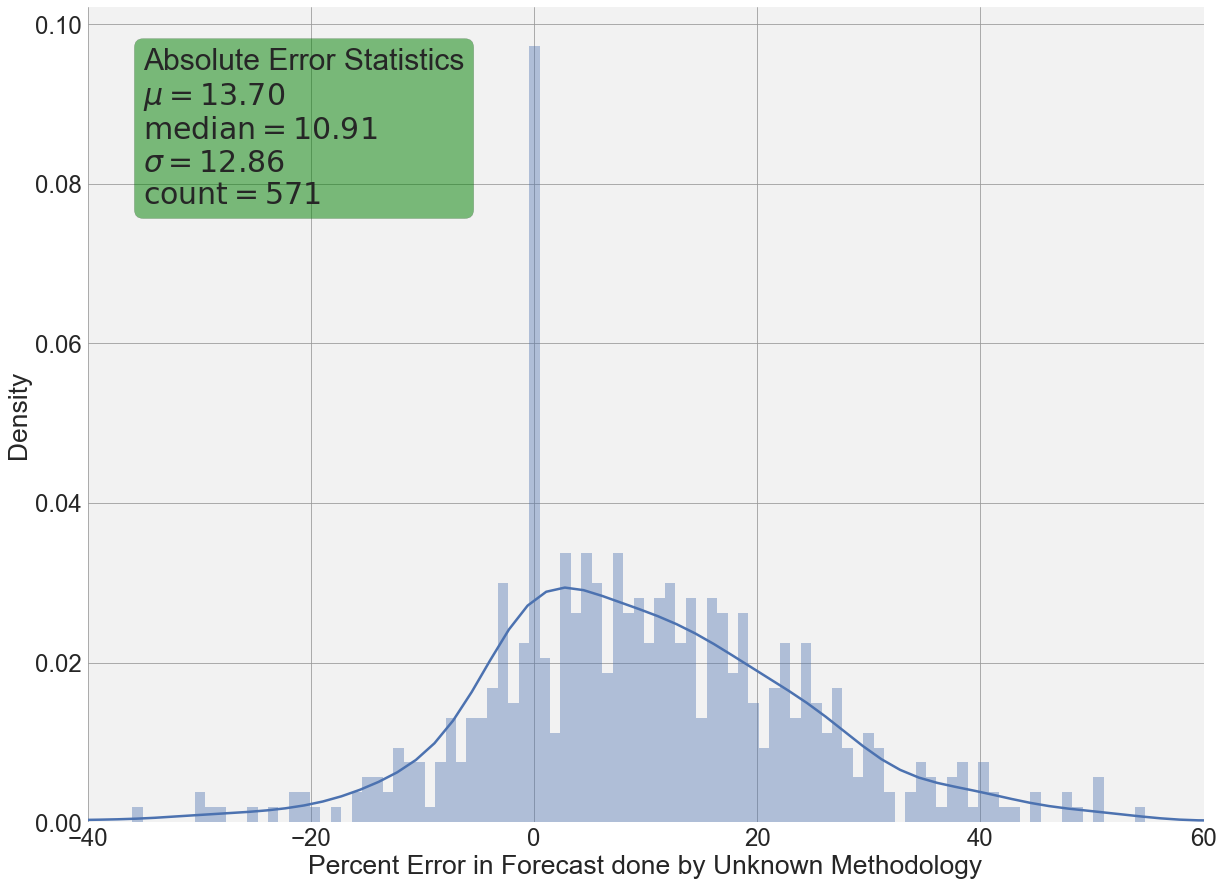

In [192]:
import numpy as np
import matplotlib.pyplot as plt


#fig, ax = plt.subplots()
x = error_method3['AbsPE']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = 'Absolute Error Statistics\n$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)


#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        #verticalalignment='top', bbox=props)

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(error_method3['PercentError'],bins=200,kde=True)
ax.figure.set_size_inches(20,15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-40,60)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Percent Error in Forecast done by Unknown Methodology')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=30, verticalalignment='top', bbox=props)

#plt.show()
ax.figure.savefig('Percent Error Distribution by Unknown Methodology.png',bbox_inches='tight')

In [194]:
project_error2=pd.read_csv('project_error2.csv')
project_error2

,InternalProjectID,AverageCount,AverageForecast,Error,PercentError,AbsPE,Func_Class,Forecast_Method,Diff_Year,UnifiedImprovementType
0,10914,67797.500000,69861.250000,2063.750000,2.954069674,2.954069674,1.000000,6.0,1.0,2
1,12343,99720.000000,99724.000000,4.000000,0.004011071,0.004011071,1.000000,6.0,5.0,1
2,12356,28800.000000,31001.000000,2201.000000,7.099770975,7.099770975,1.000000,6.0,3.0,3
3,13364,4610.000000,4910.000000,300.000000,6.109979633,6.109979633,5.000000,6.0,1.0,1
4,13486,53705.000000,60317.500000,6612.500000,10.96282173,10.96282173,1.000000,6.0,5.0,1
5,13624,580.000000,635.000000,55.000000,8.661417323,8.661417323,6.000000,6.0,0.0,1
6,14821,34445.000000,28621.750000,-5823.250000,-20.34554142,20.34554142,4.000000,6.0,2.0,1
7,16144,15556.000000,16568.736840,1012.736842,6.112335851,6.112335851,3.000000,6.0,6.0,1
8,16514,54630.000000,58143.333330,3513.333333,6.042538554,6.042538554,1.000000,6.0,6.0,2
9,16579,2190.000000,2193.500000,3.500000,0.159562343,0.159562343,5.000000,6.0,0.0,1


In [ ]:
project_error2=project_error2[project_error2['AverageForecast'].notnull()]
project_error2['AbsPE']=project_error2['AbsPE'].astype('float')
project_error2['PercentError']=project_error2['PercentError'].astype('float')

In [206]:
project_type1=project_error2[project_error2['UnifiedImprovementType']==1]#low risk project
project_type2=project_error2[project_error2['UnifiedImprovementType']==2]#high risk project
project_type3=project_error2[project_error2['UnifiedImprovementType']==3] #unknown type

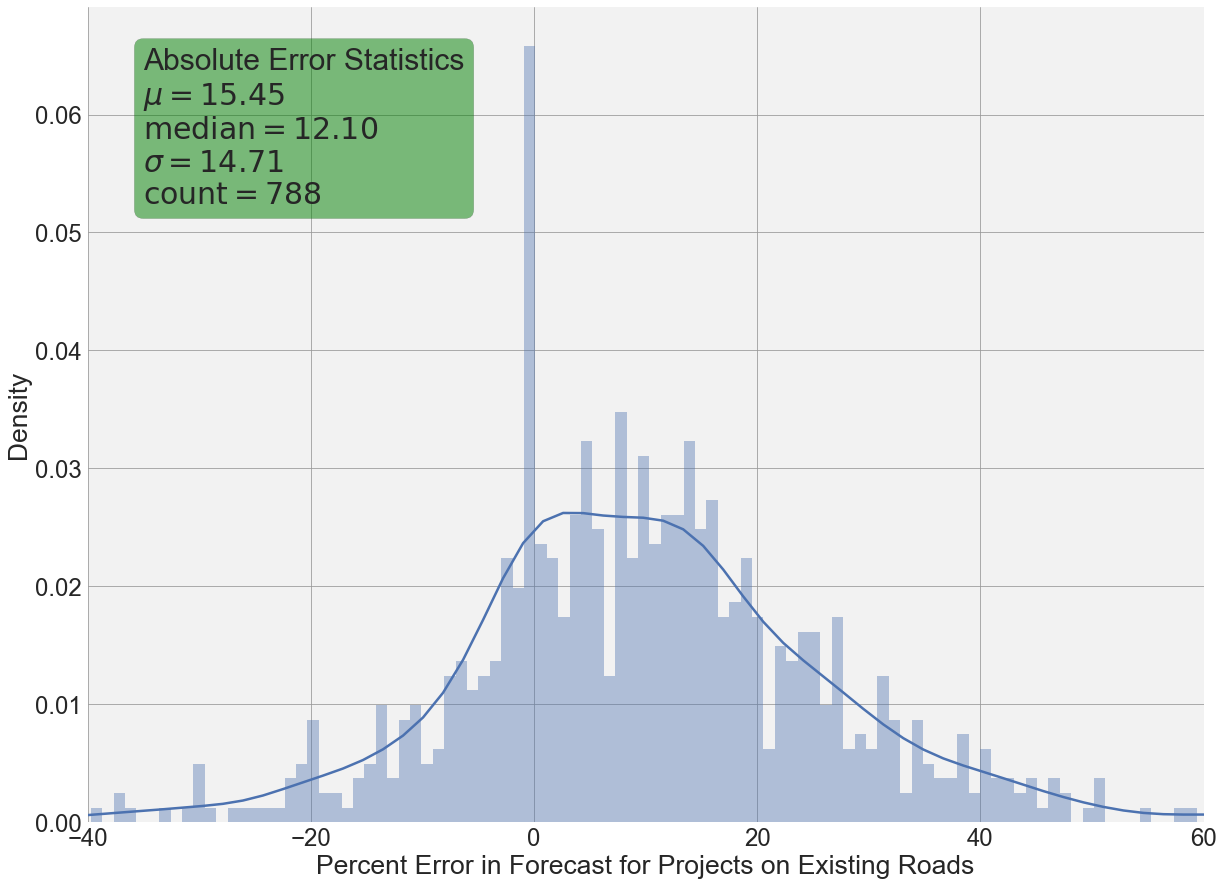

In [210]:
#fig, ax = plt.subplots()
x = project_type1['AbsPE']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = 'Absolute Error Statistics\n$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)

#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        #verticalalignment='top', bbox=props)

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(project_type1['PercentError'],bins=200,kde=True)
ax.figure.set_size_inches(20,15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-40,60)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Percent Error in Forecast for Projects on Existing Roads')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=30, verticalalignment='top', bbox=props)

#plt.show()
ax.figure.savefig('Percent Error Distribution_ Low Risk Project.png',bbox_inches='tight')

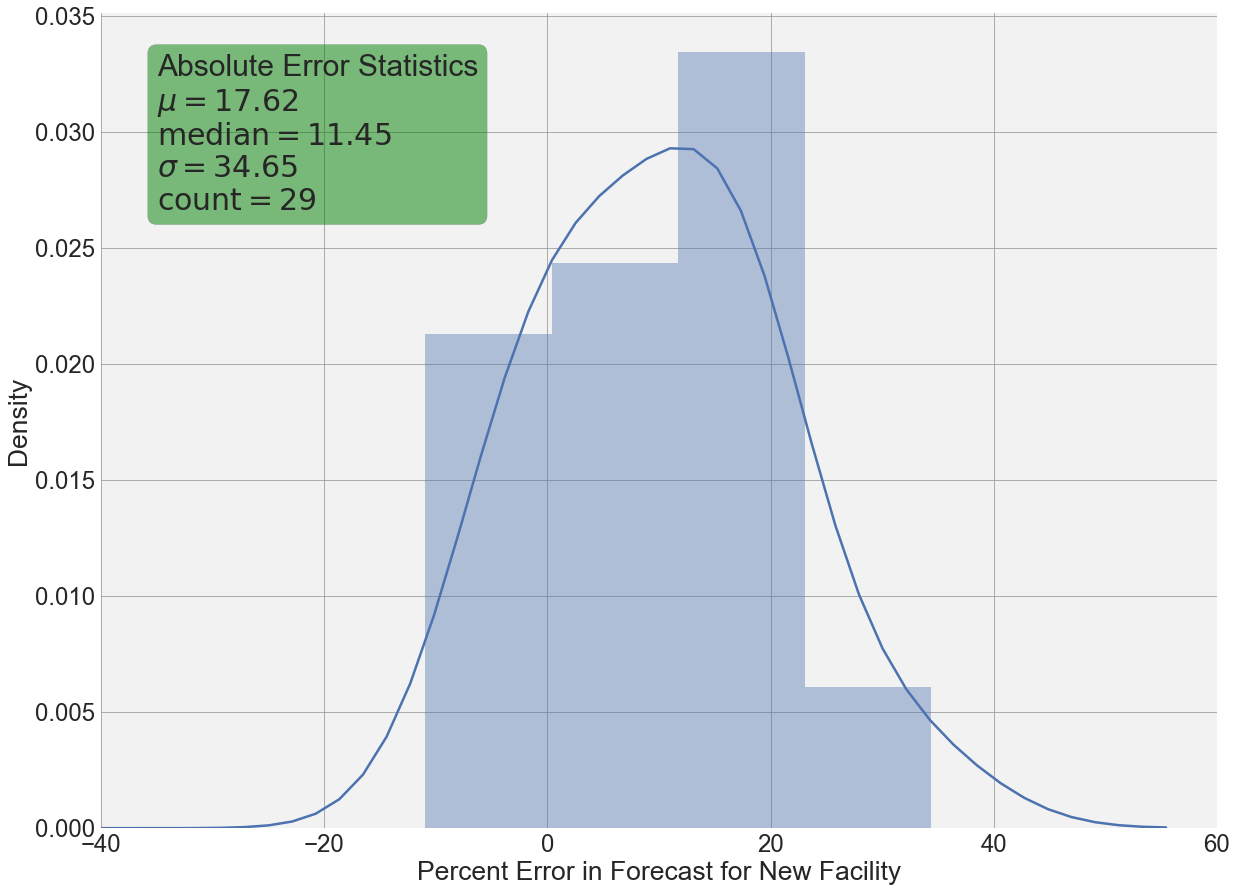

In [211]:
#fig, ax = plt.subplots()
x = project_type2['AbsPE']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = 'Absolute Error Statistics\n$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)

#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        #verticalalignment='top', bbox=props)

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(project_type2['PercentError'],bins=20,kde=True)
ax.figure.set_size_inches(20,15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-40,60)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Percent Error in Forecast for New Facility')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=30, verticalalignment='top', bbox=props)

#plt.show()
ax.figure.savefig('Percent Error Distribution_ High Risk Project.png',bbox_inches='tight')

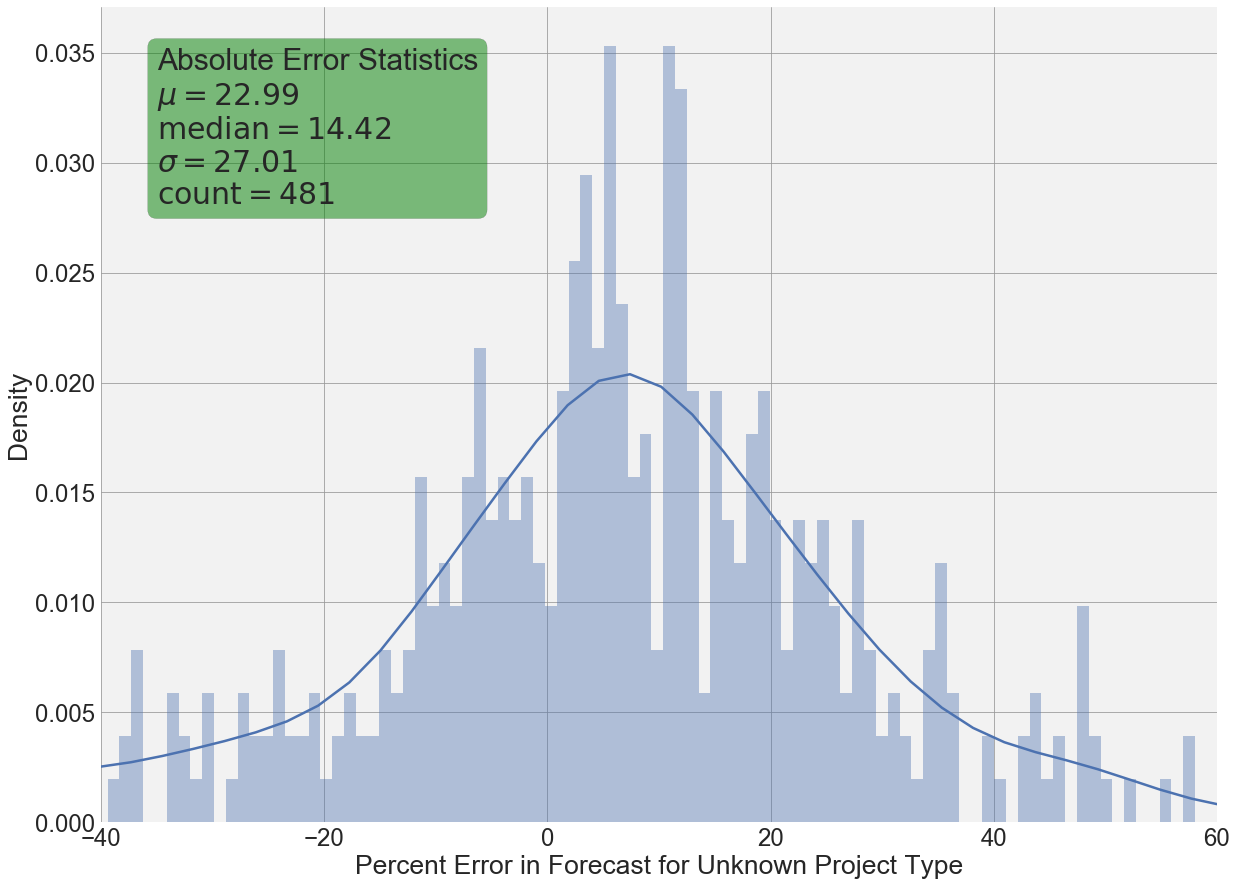

In [215]:
x = project_type3['AbsPE']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = 'Absolute Error Statistics\n$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)

#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        #verticalalignment='top', bbox=props)

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(project_type3['PercentError'],bins=300,kde=True)
ax.figure.set_size_inches(20,15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-40,60)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Percent Error in Forecast for Unknown Project Type')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=30, verticalalignment='top', bbox=props)

#plt.show()
ax.figure.savefig('Percent Error Distribution_ Unknown Type Project.png',bbox_inches='tight')

In [217]:
bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,180000]
flatdata_grouped=flatdata_adjusted.groupby(pd.cut(flatdata_adjusted['TrafficForecast'], bins)).AbsPE.describe()
#grouped statistics of the Absolute Percent Error
flatdata_grouped

,count,mean,std,min,25%,50%,75%,max
TrafficForecast,,,,,,,,
"(0, 10000]",1408.0,27.991145,32.107860,0.000000,7.701051,17.425811,35.796447,195.918367
"(10000, 20000]",1091.0,27.878016,31.621608,0.000000,8.066246,17.647059,36.581873,196.296296
"(20000, 30000]",752.0,31.706219,33.010417,0.000000,9.636273,21.225383,42.622951,192.576419
"(30000, 40000]",440.0,29.634179,27.693087,0.000000,8.949836,19.691357,45.194478,132.394366
"(40000, 50000]",304.0,25.633730,24.108895,0.002352,7.101798,17.647059,36.144578,96.319018
"(50000, 60000]",200.0,20.732889,18.203879,0.000000,4.162844,14.229822,37.138838,64.772727
"(60000, 70000]",91.0,14.935175,18.885863,0.004372,2.232640,9.814802,20.749351,124.777448
"(70000, 80000]",55.0,8.874166,8.885316,0.001600,2.470558,5.433287,17.241379,39.355742
"(80000, 90000]",44.0,12.809930,8.861811,0.001292,5.372229,12.532704,19.336384,30.713713


In [41]:
flatdata_adjusted

,BriefDescription,ProjectYear,InternalProjectID,ImprovementType,AreaTypeFuncClass,main_ProjectInformation.State,TollType,TrafficForecast,ForecastYear,ForecastYearType,...,Count,Station_Identifier,main_TrafficCounts.State,CounterID,FunctionalClass,AdjustedForecast,Error,PercentError,AbsPE,DiffYear
0,NaN,2006.0,2320,12.0,3.0,WI,No Tolls on 1+ lane,34000.0,2007,1,...,31500,401399.0,Wisconsin,58-22417-401399,3,34000.0,2500.0,7.352941,7.352941,1.0
1,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,30000.0,2011,1,...,22200,404512.0,Wisconsin,58-22419-404512,3,30000.0,7800.0,26.000000,26.000000,4.0
2,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,19000.0,2011,1,...,20100,404513.0,Wisconsin,58-22421-404513,3,19000.0,-1100.0,-5.789474,5.789474,4.0
3,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,21900.0,2011,1,...,18400,404524.0,Wisconsin,58-22423-404524,4,21900.0,3500.0,15.981735,15.981735,4.0
4,NaN,2006.0,2322,12.0,3.0,WI,No Tolls on 1+ lane,22700.0,2009,1,...,22600,401843.0,Wisconsin,58-22425-401843,3,22700.0,100.0,0.440529,0.440529,3.0
5,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,2800.0,2011,1,...,2500,404541.0,Wisconsin,58-22427-404541,5,2800.0,300.0,10.714286,10.714286,4.0
6,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,33500.0,2011,1,...,33500,404545.0,Wisconsin,58-22429-404545,3,33500.0,0.0,0.000000,0.000000,4.0
7,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,1500.0,2011,1,...,2200,404547.0,Wisconsin,58-22431-404547,7,1500.0,-700.0,-46.666667,46.666667,4.0
8,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,23800.0,2011,1,...,25400,404548.0,Wisconsin,58-22433-404548,3,23800.0,-1600.0,-6.722689,6.722689,4.0
9,NaN,2006.0,2373,12.0,1.0,WI,No Tolls on 1+ lane,8600.0,2008,1,...,6600,510108.0,Wisconsin,58-22435-510108,3,8600.0,2000.0,23.255814,23.255814,2.0


In [42]:
bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,180000]
flatdata_grouped=flatdata_adjusted.groupby(pd.cut(flatdata_adjusted['TrafficForecast'], bins)).Count.describe()
#grouped statistics of the Absolute Percent Error
flatdata_grouped

,count,mean,std,min,25%,50%,75%,max
TrafficForecast,,,,,,,,
"(0, 10000]",1408.0,5483.181108,3433.010063,130.0,2900.0,5100.0,7510.00,17500.0
"(10000, 20000]",1097.0,14839.713765,6925.800916,2321.0,10350.0,13570.0,18140.00,51500.0
"(20000, 30000]",752.0,26164.175532,11791.105858,5690.0,18015.0,22500.0,29693.75,67000.0
"(30000, 40000]",440.0,36267.806818,14045.517571,5038.0,27022.5,32500.0,44500.00,82500.0
"(40000, 50000]",306.0,49036.464052,15151.551824,4700.0,39440.0,48000.0,58500.00,85000.0
"(50000, 60000]",203.0,58325.285714,14120.602029,25000.0,47690.0,55000.0,72500.00,87000.0
"(60000, 70000]",93.0,64664.107527,15345.351567,44500.0,56100.0,61100.0,66500.00,151500.0
"(70000, 80000]",56.0,68972.107143,8633.629260,55080.0,62920.0,67790.0,73355.25,99500.0
"(80000, 90000]",47.0,76482.382979,10222.766235,61970.0,70000.0,74500.0,80285.00,103690.0


In [43]:
flatdata_grouped=flatdata_grouped.assign(LowerLimit=flatdata_grouped['mean']-1.645*flatdata_grouped['std']/np.sqrt(flatdata_grouped['count']))

In [44]:
flatdata_grouped=flatdata_grouped.assign(UpperLimit=flatdata_grouped['mean']+1.645*flatdata_grouped['std']/np.sqrt(flatdata_grouped['count']))
flatdata_grouped

,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit
TrafficForecast,,,,,,,,,,
"(0, 10000]",1408.0,5483.181108,3433.010063,130.0,2900.0,5100.0,7510.00,17500.0,5332.680016,5633.682200
"(10000, 20000]",1097.0,14839.713765,6925.800916,2321.0,10350.0,13570.0,18140.00,51500.0,14495.734240,15183.693289
"(20000, 30000]",752.0,26164.175532,11791.105858,5690.0,18015.0,22500.0,29693.75,67000.0,25456.862727,26871.488337
"(30000, 40000]",440.0,36267.806818,14045.517571,5038.0,27022.5,32500.0,44500.00,82500.0,35166.325054,37369.288582
"(40000, 50000]",306.0,49036.464052,15151.551824,4700.0,39440.0,48000.0,58500.00,85000.0,47611.636500,50461.291605
"(50000, 60000]",203.0,58325.285714,14120.602029,25000.0,47690.0,55000.0,72500.00,87000.0,56694.972320,59955.599108
"(60000, 70000]",93.0,64664.107527,15345.351567,44500.0,56100.0,61100.0,66500.00,151500.0,62046.519649,67281.695405
"(70000, 80000]",56.0,68972.107143,8633.629260,55080.0,62920.0,67790.0,73355.25,99500.0,67074.242284,70869.972001
"(80000, 90000]",47.0,76482.382979,10222.766235,61970.0,70000.0,74500.0,80285.00,103690.0,74029.451576,78935.314382


In [45]:
flatdata_grouped.to_csv('flatdata_grouped3.csv')

In [223]:
by_volume=flatdata_adjusted['AbsPE'].groupby(flatdata_adjusted['TrafficForecast']).describe()
by_volume

,count,mean,std,min,25%,50%,75%,max
TrafficForecast,,,,,,,,
170,1.0,23.529412,NaN,23.529412,23.529412,23.529412,23.529412,23.529412
250,1.0,0.334448,NaN,0.334448,0.334448,0.334448,0.334448,0.334448
300,1.0,83.946488,NaN,83.946488,83.946488,83.946488,83.946488,83.946488
430,1.0,4.651163,NaN,4.651163,4.651163,4.651163,4.651163,4.651163
450,1.0,2.222222,NaN,2.222222,2.222222,2.222222,2.222222,2.222222
470,1.0,44.680851,NaN,44.680851,44.680851,44.680851,44.680851,44.680851
480,1.0,10.416667,NaN,10.416667,10.416667,10.416667,10.416667,10.416667
540,2.0,26.596424,3.567141,24.074074,25.335249,26.596424,27.857599,29.118774
550,1.0,18.909091,NaN,18.909091,18.909091,18.909091,18.909091,18.909091


In [62]:
flatdata_grouped=pd.read_csv('flatdata_grouped3.csv')
flatdata_grouped

,TrafficForecast,ForecastVolume,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit
0,"(0, 10000]",0,1408,5483.181108,3433.010063,130,2900.0,5100,7510.00,17500,5332.680016,5633.68220
1,"(10000, 20000]",10000,1097,14839.713760,6925.800916,2321,10350.0,13570,18140.00,51500,14495.734240,15183.69329
2,"(20000, 30000]",20000,752,26164.175530,11791.105860,5690,18015.0,22500,29693.75,67000,25456.862730,26871.48834
3,"(30000, 40000]",30000,440,36267.806820,14045.517570,5038,27022.5,32500,44500.00,82500,35166.325050,37369.28858
4,"(40000, 50000]",40000,306,49036.464050,15151.551820,4700,39440.0,48000,58500.00,85000,47611.636500,50461.29160
5,"(50000, 60000]",50000,203,58325.285710,14120.602030,25000,47690.0,55000,72500.00,87000,56694.972320,59955.59911
6,"(60000, 70000]",60000,93,64664.107530,15345.351570,44500,56100.0,61100,66500.00,151500,62046.519650,67281.69540
7,"(70000, 80000]",70000,56,68972.107140,8633.629260,55080,62920.0,67790,73355.25,99500,67074.242280,70869.97200
8,"(80000, 90000]",80000,47,76482.382980,10222.766240,61970,70000.0,74500,80285.00,103690,74029.451580,78935.31438
9,"(90000, 100000]",90000,29,82916.827590,13840.422360,63540,69330.0,82670,93360.00,107060,78689.009940,87144.64523


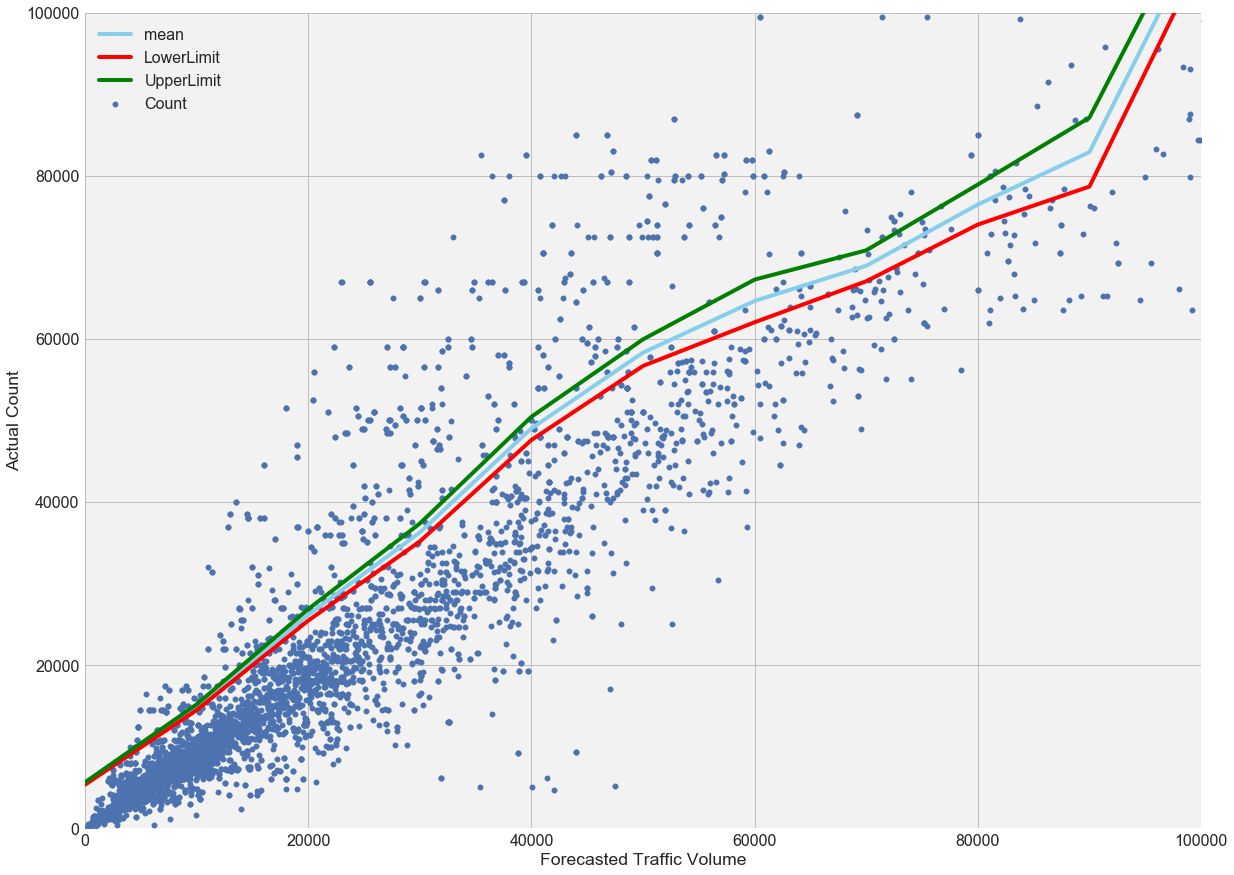

In [63]:
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
plt.figure(figsize=(20,15))
#ax=plt.plot(flatdata_grouped['Volume'],flatdata_grouped['mean'])

plt.plot( flatdata_grouped['ForecastVolume'], flatdata_grouped['mean'], marker='', color='skyblue', linewidth=4)
plt.plot( flatdata_grouped['ForecastVolume'], flatdata_grouped['LowerLimit'], marker='', color='red', linewidth=4)
plt.plot( flatdata_grouped['ForecastVolume'], flatdata_grouped['UpperLimit'], marker='', color='green', linewidth=4)

#plt.plot( flatdata_grouped['Volume'], flatdata_grouped['mean'], marker='', color='skyblue', linewidth=4)
#plt.plot( flatdata_grouped['Volume'], flatdata_grouped['LowerLimit'], marker='', color='red', linewidth=4)
#plt.plot( flatdata_grouped['Volume'], flatdata_grouped['UpperLimit'], marker='', color='green', linewidth=4)

#plt.plot(flatdata_adjusted['TrafficForecast'],flatdata_adjusted['AbsPE'])
plt.xlabel('Forecasted Traffic Volume')
plt.ylabel('Actual Count')


plt.scatter(flatdata_adjusted['TrafficForecast'],flatdata_adjusted['Count'])

plt.xlim(0,100000)
plt.ylim(0,100000)
#ax.figure.set_size_inches(20,10)
#ax.set_xlim(0
#            ,100000)
#ax.set_ylim(-200,200)
#ax.set_title('Number of records in the data set, by date')
#ax.set_xlabel('Forecasted Volume')
#ax.set_ylabel('Percentage Error')
#ax.set_facecolor(axis_bgcolor)
#ax.figure.savefig('scatterplot Percent Error.png',bbox_inches='tight')

#ax.figure.set_size_inches(15,8)
#ax.set_xlim(5000,100000)

#ax.set_ylim(-150,150)

plt.legend()

#ax.set_ylim(-150,150)
#plt.savefig('90% Confidence Interval by Volume.png', bbox_inches='tight')

In [47]:
flatdata_groupedq=flatdata_adjusted.groupby(pd.qcut(flatdata_adjusted['TrafficForecast'],15)).Count.describe()
flatdata_groupedq

,count,mean,std,min,25%,50%,75%,max
TrafficForecast,,,,,,,,
"(169.999, 2800.0]",308.0,1815.743506,1172.645894,130.0,1050.0,1635.0,2200.00,7150.0
"(2800.0, 4696.0]",299.0,4112.899666,1777.157754,410.0,3000.0,3550.0,4700.00,10850.0
"(4696.0, 6800.0]",310.0,6021.400000,2657.525562,450.0,4337.5,5450.0,6740.00,16500.0
"(6800.0, 8700.0]",301.0,7633.083056,2809.962138,1170.0,6000.0,7200.0,8500.00,17500.0
"(8700.0, 10740.0]",301.0,9422.242525,3175.961992,1640.0,7300.0,8880.0,10925.00,18500.0
"(10740.0, 13208.0]",302.0,11945.162252,5128.793575,4025.0,9242.5,11040.0,13000.00,38500.0
"(13208.0, 16200.0]",308.0,15926.314935,7387.291603,2321.0,11750.0,14080.0,18775.00,44500.0
"(16200.0, 19300.0]",300.0,17876.990000,7084.101282,4770.0,14690.0,16600.0,19762.50,51500.0
"(19300.0, 22350.0]",303.0,20023.072607,8370.599841,5690.0,15980.0,18320.0,21430.00,59000.0


In [48]:
flatdata_groupedq=flatdata_groupedq.assign(LowerLimit=flatdata_groupedq['mean']-1.645*flatdata_groupedq['std']/np.sqrt(flatdata_groupedq['count']))
flatdata_groupedq=flatdata_groupedq.assign(UpperLimit=flatdata_groupedq['mean']+1.645*flatdata_groupedq['std']/np.sqrt(flatdata_groupedq['count']))
flatdata_groupedq

,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit
TrafficForecast,,,,,,,,,,
"(169.999, 2800.0]",308.0,1815.743506,1172.645894,130.0,1050.0,1635.0,2200.00,7150.0,1705.828388,1925.658625
"(2800.0, 4696.0]",299.0,4112.899666,1777.157754,410.0,3000.0,3550.0,4700.00,10850.0,3943.833661,4281.965670
"(4696.0, 6800.0]",310.0,6021.400000,2657.525562,450.0,4337.5,5450.0,6740.00,16500.0,5773.108126,6269.691874
"(6800.0, 8700.0]",301.0,7633.083056,2809.962138,1170.0,6000.0,7200.0,8500.00,17500.0,7366.653058,7899.513055
"(8700.0, 10740.0]",301.0,9422.242525,3175.961992,1640.0,7300.0,8880.0,10925.00,18500.0,9121.109802,9723.375248
"(10740.0, 13208.0]",302.0,11945.162252,5128.793575,4025.0,9242.5,11040.0,13000.00,38500.0,11459.675201,12430.649302
"(13208.0, 16200.0]",308.0,15926.314935,7387.291603,2321.0,11750.0,14080.0,18775.00,44500.0,15233.885077,16618.744793
"(16200.0, 19300.0]",300.0,17876.990000,7084.101282,4770.0,14690.0,16600.0,19762.50,51500.0,17204.183720,18549.796280
"(19300.0, 22350.0]",303.0,20023.072607,8370.599841,5690.0,15980.0,18320.0,21430.00,59000.0,19232.027645,20814.117569


In [49]:
flatdata_groupedq.to_csv('flatdata_groupedq2.csv')

In [50]:
flatdata_groupedq=pd.read_csv('flatdata_groupedq2.csv')
flatdata_groupedq

,TrafficForecast,ForecastVolume,ActualCount,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit
0,"(169.999, 2800.0]",170,308,1815.743506,1172.645894,130,1050.0,1635,2200.00,7150,1705.828388,1925.658625
1,"(2800.0, 4696.0]",2801,299,4112.899666,1777.157754,410,3000.0,3550,4700.00,10850,3943.833661,4281.965670
2,"(4696.0, 6800.0]",4697,310,6021.400000,2657.525562,450,4337.5,5450,6740.00,16500,5773.108126,6269.691874
3,"(6800.0, 8700.0]",6801,301,7633.083056,2809.962138,1170,6000.0,7200,8500.00,17500,7366.653058,7899.513055
4,"(8700.0, 10740.0]",8701,301,9422.242525,3175.961992,1640,7300.0,8880,10925.00,18500,9121.109802,9723.375248
5,"(10740.0, 13208.0]",10741,302,11945.162250,5128.793575,4025,9242.5,11040,13000.00,38500,11459.675200,12430.649300
6,"(13208.0, 16200.0]",13209,308,15926.314940,7387.291603,2321,11750.0,14080,18775.00,44500,15233.885080,16618.744790
7,"(16200.0, 19300.0]",16201,300,17876.990000,7084.101282,4770,14690.0,16600,19762.50,51500,17204.183720,18549.796280
8,"(19300.0, 22350.0]",19301,303,20023.072610,8370.599841,5690,15980.0,18320,21430.00,59000,19232.027650,20814.117570
9,"(22350.0, 26000.0]",22351,304,26783.157890,11533.546150,8400,19142.5,23000,30230.00,67000,25694.999870,27871.315920


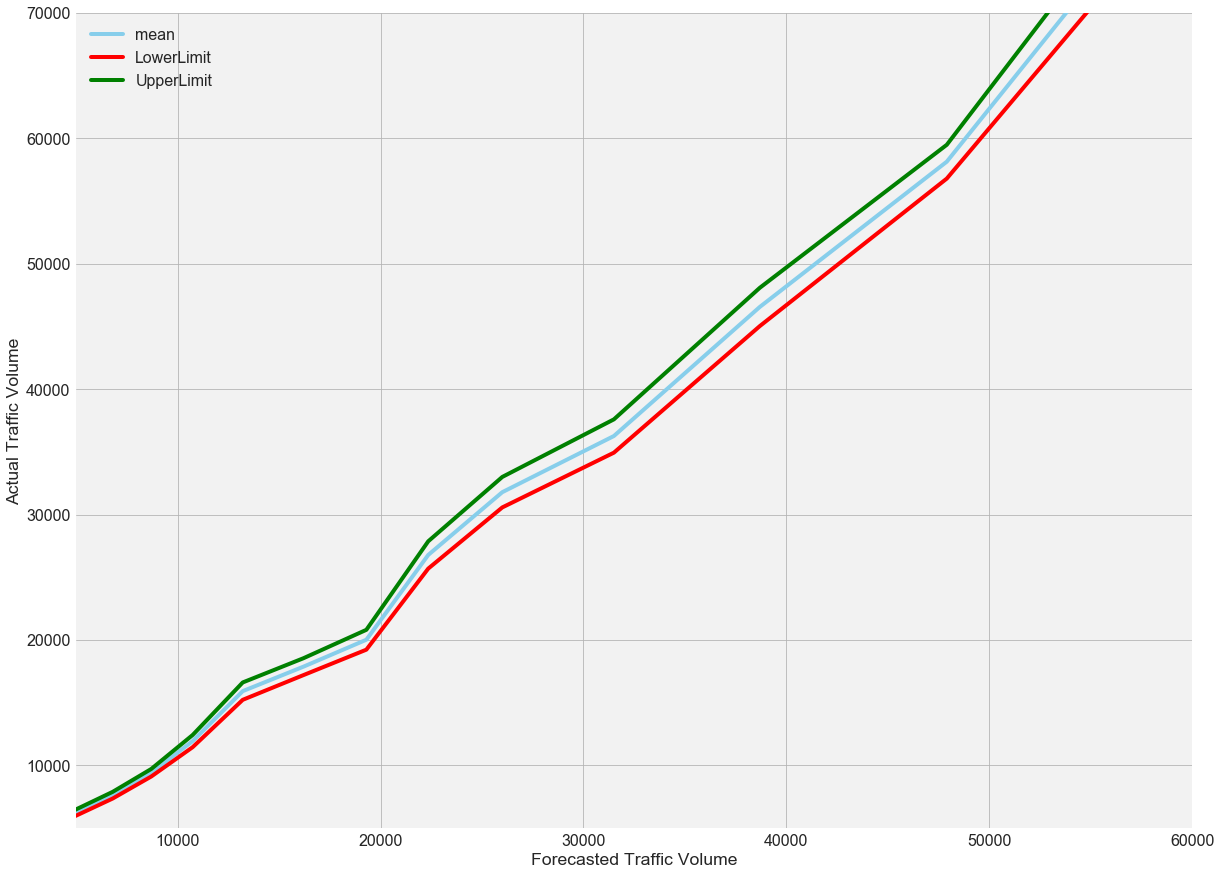

In [56]:
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
plt.figure(figsize=(20,15))
#ax=plt.plot(flatdata_grouped['Volume'],flatdata_grouped['mean'])

plt.plot( flatdata_groupedq['ForecastVolume'], flatdata_groupedq['mean'], marker='', color='skyblue', linewidth=4)
plt.plot( flatdata_groupedq['ForecastVolume'], flatdata_groupedq['LowerLimit'], marker='', color='red', linewidth=4)
plt.plot( flatdata_groupedq['ForecastVolume'], flatdata_groupedq['UpperLimit'], marker='', color='green', linewidth=4)

#plt.plot(flatdata_adjusted['TrafficForecast'],flatdata_adjusted['AbsPE'])
plt.xlabel('Forecasted Traffic Volume')
plt.ylabel('Actual Traffic Volume')


#sns.regplot(flatdata_adjusted['TrafficForecast'],flatdata_adjusted['AbsPE'])

plt.xlim(5000,60000)
plt.ylim(5000,70000)
#ax.figure.set_size_inches(20,10)
#ax.set_xlim(0
#            ,100000)
#ax.set_ylim(-200,200)
#ax.set_title('Number of records in the data set, by date')
#ax.set_xlabel('Forecasted Volume')
#ax.set_ylabel('Percentage Error')
#ax.set_facecolor(axis_bgcolor)
#ax.figure.savefig('scatterplot Percent Error.png',bbox_inches='tight')

#ax.figure.set_size_inches(15,8)
#ax.set_xlim(5000,100000)

#ax.set_ylim(-150,150)

plt.legend()

#ax.set_ylim(-150,150)
plt.savefig('90% Confidence Interval by Volume against Volume.png', bbox_inches='tight')

In [30]:
flatdata_adjusted=pd.read_csv('flatdata_adjusted.csv')

In [31]:
flatdata_adjusted=flatdata_adjusted.assign(UnifiedImprovementType=flatdata_adjusted.apply(UnifiedImprovement, axis=1))
flatdata_adjusted

,BriefDescription,ProjectYear,InternalProjectID,ImprovementType,AreaTypeFuncClass,main_ProjectInformation.State,TollType,TrafficForecast,ForecastYear,ForecastYearType,YearForecastProduced,ForecastingAgency,ForecastMethodology,SegmentDescription,ProjectID,SegmentID,CountID,Year_ofObservation,Count,Station_Identifier,main_TrafficCounts.State,CounterID,FunctionalClass,AdjustedForecast,Error,PercentError,AbsPE,UnifiedImprovementType
0,NaN,2006.0,2320,12.0,3.0,WI,No Tolls on 1+ lane,34000.0,2007,1,2006.0,1-State DOT,1,NaN,58-6302-2320-,NaN,58-22417-401399,2007,31500,401399.0,Wisconsin,58-22417-401399,3,34000.0,2500.0,7.352941,7.352941,3
1,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,30000.0,2011,1,2007.0,1-State DOT,1,NaN,58-6303-2467-,NaN,58-22419-404512,2011,22200,404512.0,Wisconsin,58-22419-404512,3,30000.0,7800.0,26.000000,26.000000,3
2,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,19000.0,2011,1,2007.0,1-State DOT,1,NaN,58-6304-2467-,NaN,58-22421-404513,2011,20100,404513.0,Wisconsin,58-22421-404513,3,19000.0,-1100.0,-5.789474,5.789474,3
3,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,21900.0,2011,1,2007.0,1-State DOT,1,NaN,58-6305-2467-,NaN,58-22423-404524,2011,18400,404524.0,Wisconsin,58-22423-404524,4,21900.0,3500.0,15.981735,15.981735,3
4,NaN,2006.0,2322,12.0,3.0,WI,No Tolls on 1+ lane,22700.0,2009,1,2006.0,1-State DOT,1,NaN,58-6306-2322-,NaN,58-22425-401843,2009,22600,401843.0,Wisconsin,58-22425-401843,3,22700.0,100.0,0.440529,0.440529,3
5,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,2800.0,2011,1,2007.0,1-State DOT,1,NaN,58-6307-2467-,NaN,58-22427-404541,2011,2500,404541.0,Wisconsin,58-22427-404541,5,2800.0,300.0,10.714286,10.714286,3
6,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,33500.0,2011,1,2007.0,1-State DOT,1,NaN,58-6308-2467-,NaN,58-22429-404545,2011,33500,404545.0,Wisconsin,58-22429-404545,3,33500.0,0.0,0.000000,0.000000,3
7,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,1500.0,2011,1,2007.0,1-State DOT,1,NaN,58-6309-2467-,NaN,58-22431-404547,2011,2200,404547.0,Wisconsin,58-22431-404547,7,1500.0,-700.0,-46.666667,46.666667,3
8,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,23800.0,2011,1,2007.0,1-State DOT,1,NaN,58-6310-2467-,NaN,58-22433-404548,2011,25400,404548.0,Wisconsin,58-22433-404548,3,23800.0,-1600.0,-6.722689,6.722689,3
9,NaN,2006.0,2373,12.0,1.0,WI,No Tolls on 1+ lane,8600.0,2008,1,2006.0,1-State DOT,1,NaN,58-6311-2373-,NaN,58-22435-510108,2008,6600,510108.0,Wisconsin,58-22435-510108,3,8600.0,2000.0,23.255814,23.255814,3


In [6]:
pd.options.display.max_columns=50

In [45]:
uniimptype_method=flatdata_adjusted.groupby(['UnifiedImprovementType','ForecastMethodology']).AbsPE.describe()
uniimptype_method

count        mean        std  \
UnifiedImprovementType ForecastMethodology                                  
1                      1                      82.0   18.925950  18.705978   
                       2                       6.0    9.668526   7.002646   
                       4                     153.0   19.758726  18.993864   
                       5                     173.0   20.257176  20.972023   
                       6                    1190.0   15.256891  15.295340   
2                      4                      12.0    7.851238   4.920165   
                       5                       1.0  192.294066        NaN   
                       6                     168.0   15.285474  15.018507   
3                      1                    2281.0   37.494103  35.978897   
                       2                       1.0   16.996047        NaN   
                       4                     216.0   16.771661  15.689880   
                       5                      41.0   21.578972  19.994717   
                       6                     228.0   17.643101  17.902457   

                                                   min         25%  \
UnifiedImprovementType ForecastMethodology                           
1                      1                      0.666667    6.033017   
                       2                      0.346620    4.053602   
                       4                      0.000000    7.188353   
                       5                      0.645374    7.492355   
                       6                      0.000000    4.265224   
2                      4                      1.296112    3.678867   
                       5                    192.294066  192.294066   
                       6                      0.008983    4.953786   
3                      1                      0.000000   11.069652   
                       2                     16.996047   16.996047   
                       4                      0.000000    6.816294   
                       5                      2.578797    7.903357   
                       6                      0.071172    5.533451   

                                                   50%         75%         max  
UnifiedImprovementType ForecastMethodology                                      
1                      1                     13.336878   26.056251   93.379791  
                       2                     13.370076   14.503968   15.094340  
                       4                     14.373089   27.208481  145.614035  
                       5                     13.857678   25.129032  124.777448  
                       6                     12.130212   21.786558  146.464647  
2                      4                      7.321217    9.823700   17.968750  
                       5                    192.294066  192.294066  192.294066  
                       6                     10.971332   22.483520   83.451060  
3                      1                     27.631579   52.112676  196.296296  
                       2                     16.996047   16.996047   16.996047  
                       4                     13.544452   22.258772  146.666667  
                       5                     16.342412   27.397260   87.420724  
                       6                     12.689437   24.118029  169.899323

In [27]:
imptype_method.to_csv('ImpType_Method.csv')

In [46]:
facilitytype_method=flatdata_adjusted.groupby(['FunctionalClass','ForecastMethodology']).AbsPE.describe()
facilitytype_method

count        mean        std  \
FunctionalClass ForecastMethodology                                  
1               1                      22.0   11.933930   8.532855   
                4                      29.0    8.675877   9.218073   
                5                       4.0   56.753387  49.748630   
                6                     493.0   10.697350  10.701828   
3               1                     183.0   15.390224  14.027760   
                2                       2.0    7.091976   8.593819   
                4                     193.0   17.968754  16.102499   
                5                      87.0   18.196305  17.777446   
                6                     532.0   17.219022  15.851237   
4               1                      78.0   19.945063  16.279076   
                2                       3.0   14.493528   0.810699   
                4                      64.0   19.145876  22.779955   
                5                      29.0   25.193936  31.723586   
                6                     288.0   18.209165  17.011685   
5               1                      33.0   18.833404  19.526688   
                4                      24.0   21.135021  21.143724   
                6                     253.0   18.610257  19.583831   
6               1                       7.0   23.778069  19.264983   
                4                       1.0   44.680851        NaN   
                5                       1.0  192.294066        NaN   
                6                      14.0   19.717751  10.360932   
7               1                       1.0   46.666667        NaN   
8               1                    2039.0   40.022898  36.947557   
                2                       2.0    8.671334  11.772923   
                4                      70.0   17.759305  12.836808   
                5                      94.0   19.665032  15.551946   
                6                       6.0   13.881688  14.633200   

                                            min         25%         50%  \
FunctionalClass ForecastMethodology                                       
1               1                      1.257862    6.424139    9.645227   
                4                      0.353357    3.245436    6.250000   
                5                     18.987342   19.936709   41.624380   
                6                      0.000000    2.550678    7.991038   
3               1                      0.000000    5.607966   11.111111   
                2                      1.015228    4.053602    7.091976   
                4                      0.000000    7.547170   14.285714   
                5                      0.704225    7.527690   13.350126   
                6                      0.000000    5.141360   13.907363   
4               1                      0.000000    8.701299   16.181818   
                2                     13.571429   14.193122   14.814815   
                4                      0.000000    7.111172   15.268065   
                5                      1.515152    4.615385   10.344828   
                6                      0.000000    6.901021   14.703909   
5               1                      0.000000    6.666667   11.538462   
                4                      0.000000    6.726540   13.432432   
                6                      0.000000    6.109980   13.755459   
6               1                      2.222222    6.340580   26.956522   
                4                     44.680851   44.680851   44.680851   
                5                    192.294066  192.294066  192.294066   
                6                      4.277595    9.721869   20.356192   
7               1                     46.666667   46.666667   46.666667   
8               1                      0.000000   12.165522   31.500000   
                2                      0.346620    4.508977    8.671334   
                4                      1.123596    7.1459

In [43]:
flatdata_adjusted.groupby(['ForecastMethodology','UnifiedImprovementType']).AbsPE.describe()

count        mean         std  \
ForecastMethodology UnifiedImprovementType                                   
1                   1                         83.0   21.773759   31.918299   
                    3                       2364.0   53.079181  116.347956   
2                   1                          6.0    9.668526    7.002646   
                    3                          1.0   16.996047         NaN   
4                   1                        153.0   19.758726   18.993864   
                    2                         12.0    7.851238    4.920165   
                    3                        216.0   16.771661   15.689880   
5                   1                        174.0   23.922735   52.680206   
                    2                          2.0  219.751993   38.831373   
                    3                         41.0   21.578972   19.994717   
6                   1                       1192.0   16.420391   35.952834   
                    2                        168.0   15.285474   15.018507   
                    3                        228.0   17.643101   17.902457   

                                                   min         25%  \
ForecastMethodology UnifiedImprovementType                           
1                   1                         0.666667    6.050997   
                    3                         0.000000   11.210921   
2                   1                         0.346620    4.053602   
                    3                        16.996047   16.996047   
4                   1                         0.000000    7.188353   
                    2                         1.296112    3.678867   
                    3                         0.000000    6.816294   
5                   1                         0.645374    7.510022   
                    2                       192.294066  206.023029   
                    3                         2.578797    7.903357   
6                   1                         0.000000    4.273471   
                    2                         0.008983    4.953786   
                    3                         0.071172    5.533451   

                                                   50%         75%  \
ForecastMethodology UnifiedImprovementType                           
1                   1                        13.372093   26.372819   
                    3                        29.836531   54.575758   
2                   1                        13.370076   14.503968   
                    3                        16.996047   16.996047   
4                   1                        14.373089   27.208481   
                    2                         7.321217    9.823700   
                    3                        13.544452   22.258772   
5                   1                        13.951900   25.386032   
                    2                       219.751993  233.480957   
                    3                        16.342412   27.397260   
6                   1                        12.136515   21.870003   
                    2                        10.971332   22.483520   
                    3                        12.689437   24.118029   

                                                    max  
ForecastMethodology UnifiedImprovementType               
1                   1                        255.294118  
                    3                       2142.424242  
2                   1                         15.094340  
                    3                         16.996047  
4                   1                        145.614035  
                    2                         17.968750  
                    3                        146.666667  
5                   1                        658.064516  
                    2                        247.209920  
                    3                         87.420724  
6                   1                       1096.781076  
                  

In [86]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt


%matplotlib inline


def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1]: M. Duarte.  "Curve fitting," JUpyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = t*s_err*np.sqrt(1/n + (x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))
    ax.fill_between(x2, y2+ci, y2-ci, color="#b9cfe7", edgecolor="")

    return ax


def plot_ci_bootstrap(n, x, y, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.

    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.

    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers

    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html

    """ 
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint
    nx = n 

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid)-1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(x, y + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(x, sp.polyval(pc,x), "b-", linewidth=2, alpha=3.0/float(nboot))

    return ax

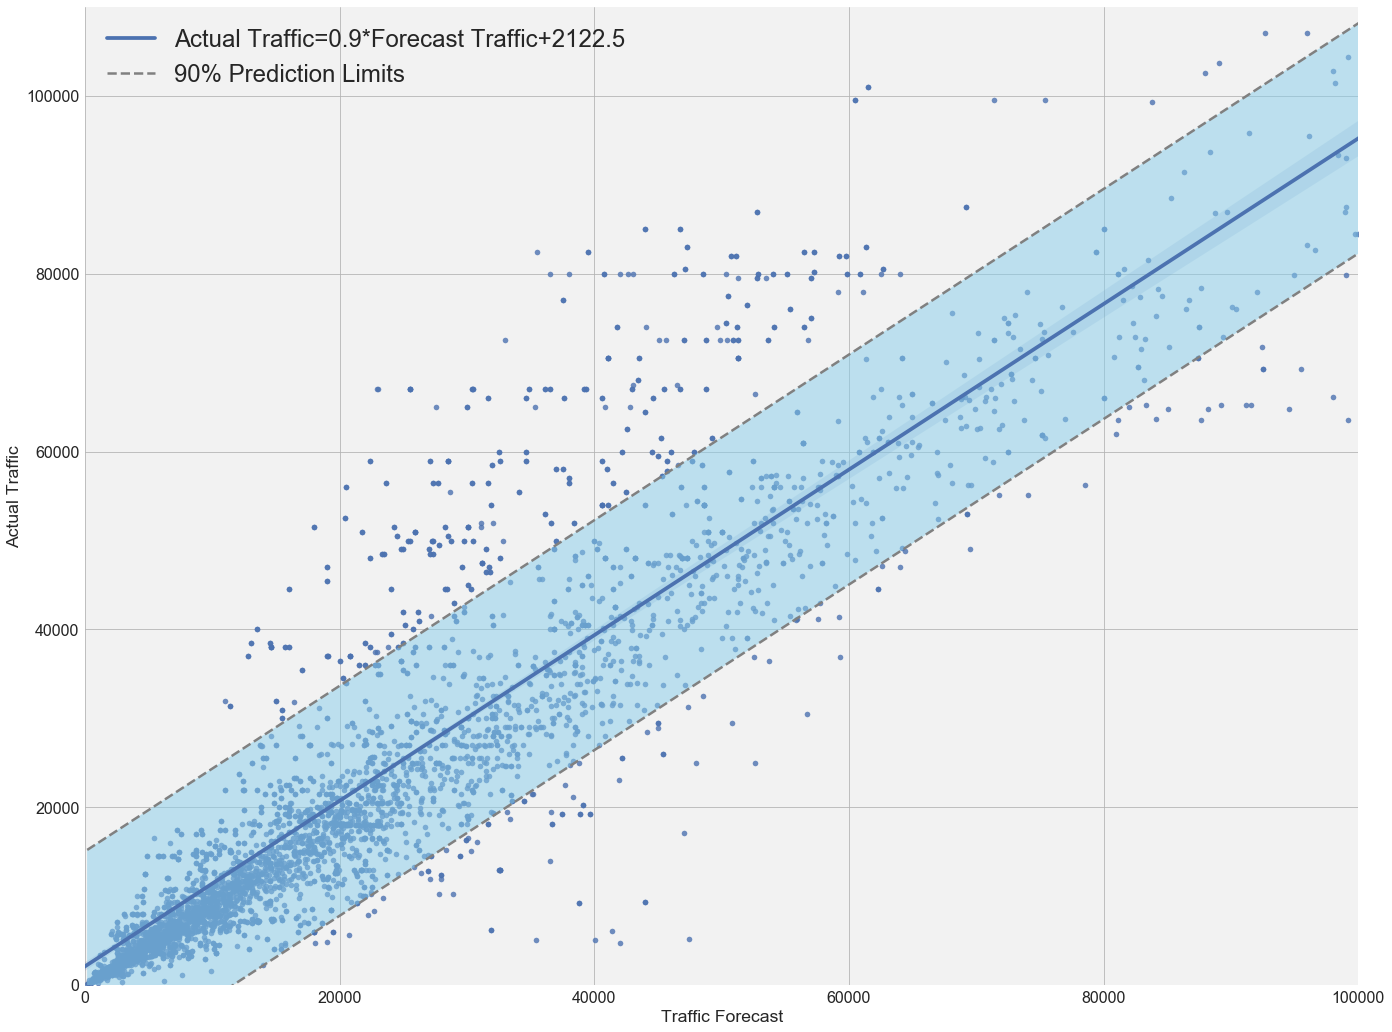

In [159]:
# Computations ----------------------------------------------------------------
# Raw Data
#heights = np.array([50,52,53,54,58,60,62,64,66,67,68,70,72,74,76,55,50,45,65])
#weights = np.array([25,50,55,75,80,85,50,65,85,55,45,45,50,75,95,65,50,40,45])

sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})

x = flatdata_adjusted['TrafficForecast']
y = flatdata_adjusted['Count']

# Modeling with Numpy
p, cov = np.polyfit(x, y, 1, cov=True)        # parameters and covariance from of the fit
y_model = np.polyval(p, x)                    # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = y.size                              # number of observations
m = p.size                                    # number of parameters
DF = n - m                                    # degrees of freedom
t = stats.t.ppf(0.90, n - m)                  # used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                           
chi2 = np.sum((resid/y_model)**2)             # chi-squared; estimates error in data
chi2_red = chi2/(DF)                          # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2)/(DF))        # standard deviation of the error


# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20,15))

# Data
#ax.scatter(x,y)
        #"o", color="blue", markersize=8,alpha=0.3,
#         markeredgewidth=1,markeredgecolor="b")

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax = sns.regplot(x, y, data=flatdata_adjusted, color='b', 
                 line_kws={'label':"Actual Traffic={0:.1f}*Forecast Traffic+{1:.1f}".format(slope,intercept)})

# Fit
#ax.plot(x,y_model,"-", color="0.1", linewidth=1.5, alpha=0.5, label="Fit")  

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = np.linspace(np.min(y_model), np.max(y_model), 100)

# Confidence Interval (select one)
#plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
#plot_ci_bootstrap(n, x, y, resid, ax=ax)

# Prediction Interval
pi = t*s_err*np.sqrt(1+1/n+(x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))   
ax.fill_between(x2, y2+pi, y2-pi, color="skyblue", linestyle="--",alpha=0.5)
ax.plot(x2, y2-pi, "--", color="0.5", label="90% Prediction Limits")
ax.plot(x2, y2+pi, "--", color="0.5")

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})

chi=chi2
chi_red = chi2_red
stand_error=s_err
textstr = 'Estimates of Error\nChi Squared=%.2f\nReduced Chi Squared=%.2f\nStandard Deviation of Error=%.2f' % (chi, chi_red,stand_error)

#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        #verticalalignment='top', bbox=props)

#ax.text(0.6, 0.95, textstr, transform=ax.transAxes, verticalalignment='top',fontsize=20, bbox=props)

# Figure Modifications --------------------------------------------------------
# Borders
ax.spines["top"].set_color("0.5")
ax.spines["bottom"].set_color("0.5")
ax.spines["left"].set_color("0.5")
ax.spines["right"].set_color("0.5")
ax.get_xaxis().set_tick_params(direction="out")
ax.get_yaxis().set_tick_params(direction="out")
ax.xaxis.tick_bottom()
ax.yaxis.tick_left() 

# Labels
#plt.title("Fit Plot for Weight", fontsize="14", fontweight="bold")
plt.xlabel("Traffic Forecast")
plt.ylabel("Actual Traffic")
#plt.xlim(np.min(x)-1,np.max(x)+1)
plt.xlim(0,100000)
plt.ylim(0,110000)



# Custom legend
handles, labels = ax.get_legend_handles_labels()
display = (0,2)
#anyArtist = plt.Line2D((0,1),(0,0), color="green")  # Create custom artists
#legend = plt.legend(
#          [handle for i,handle in enumerate(handles) if i in display]+[anyArtist],
#          [label for i,label in enumerate(labels) if i in display]+["90% Confidence Limits"],
#          loc=9, bbox_to_anchor=(0, -0.21, 1., .102), ncol=3, mode="expand")  
frame = legend.get_frame().set_edgecolor("0.8")

plt.legend()
# Save Figure
plt.tight_layout()
plt.savefig("90% Confidence Interval Actual Traffic and Forecast Traffic.png", bbox_extra_artists=(legend,), bbox_inches="tight")

plt.show()

In [155]:
traffic=flatdata_adjusted[flatdata_adjusted['TrafficForecast']<30000]
x = flatdata_adjusted['TrafficForecast']
y = flatdata_adjusted['Count']

# Modeling with Numpy
p, cov = np.polyfit(x, y, 1, cov=True)        # parameters and covariance from of the fit
y_model = np.polyval(p, x)                    # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = x.size                              # number of observations
m = p.size                                    # number of parameters
DF = n - m                                    # degrees of freedom
t = stats.t.ppf(0.95, n - m) 
stats.linregress(x,y)

LinregressResult(slope=0.9311105357374132, intercept=2122.529231202123, rvalue=0.9215754998934809, pvalue=0.0, stderr=0.0058145917526545654)

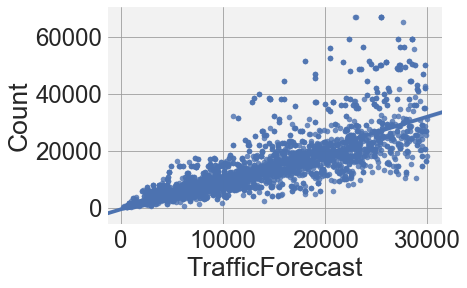

In [164]:
traffic=flatdata_adjusted[flatdata_adjusted['TrafficForecast']<30000]
x = traffic['TrafficForecast']
y = traffic['Count']
ax = sns.regplot(x, y, data=traffic, color='b')
